# Star Hotels Project
#####  by Narges Shahmohammadi

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [92]:
import pandas as pd
import numpy as np
import datetime

import warnings

warnings.filterwarnings("ignore")


# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

pd.set_option('mode.chained_assignment', None)
# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)  

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

pdata = pd.read_csv("StarHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

In [93]:
pdata.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.880,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.000,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.500,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.500,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.670,0,Not_Canceled


In [94]:
pdata.shape#we have 56926 rows and 18 columns

(56926, 18)

In [95]:
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x)  
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,56926.000,1.876,0.519,0.000,2.000,2.000,2.000,4.000
no_of_children,56926.000,0.111,0.409,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,56926.000,0.836,0.876,0.000,0.000,1.000,2.000,8.000
no_of_week_nights,56926.000,2.262,1.432,0.000,1.000,2.000,3.000,17.000
required_car_parking_space,56926.000,0.026,0.160,0.000,0.000,0.000,0.000,1.000
lead_time,56926.000,93.714,92.408,0.000,21.000,65.000,142.000,521.000
arrival_year,56926.000,2018.248,0.645,2017.000,2018.000,2018.000,2019.000,2019.000
arrival_month,56926.000,6.490,3.027,1.000,4.000,6.000,9.000,12.000
arrival_date,56926.000,15.636,8.719,1.000,8.000,16.000,23.000,31.000
repeated_guest,56926.000,0.025,0.155,0.000,0.000,0.000,0.000,1.000


In [96]:
pdata.duplicated().sum()
#the number of duplicates is high 

14350

In [97]:
pdata.drop_duplicates(keep=False,inplace=True)#deleting the duplicates

In [98]:
pdata.isnull().sum()#lets check if there is any missing values

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* there is no missing values

In [272]:
pdata.info()#checking the data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37725 entries, 1 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          37725 non-null  int64  
 1   no_of_children                        37725 non-null  int64  
 2   no_of_weekend_nights                  37725 non-null  int64  
 3   no_of_week_nights                     37725 non-null  int64  
 4   type_of_meal_plan                     37725 non-null  object 
 5   required_car_parking_space            37725 non-null  int64  
 6   room_type_reserved                    37725 non-null  object 
 7   lead_time                             37725 non-null  int64  
 8   arrival_year                          37725 non-null  int64  
 9   arrival_month                         37725 non-null  int64  
 10  arrival_date                          37725 non-null  int64  
 11  market_segment_

* 13 columns are intger
* 4 columns are object `(booking_status)(market_segment_type)(room_type_reserved)(type_of_meal_plan)`
* 1 column is float`(avg_price_per_room)`

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# Univariate Data Analysis

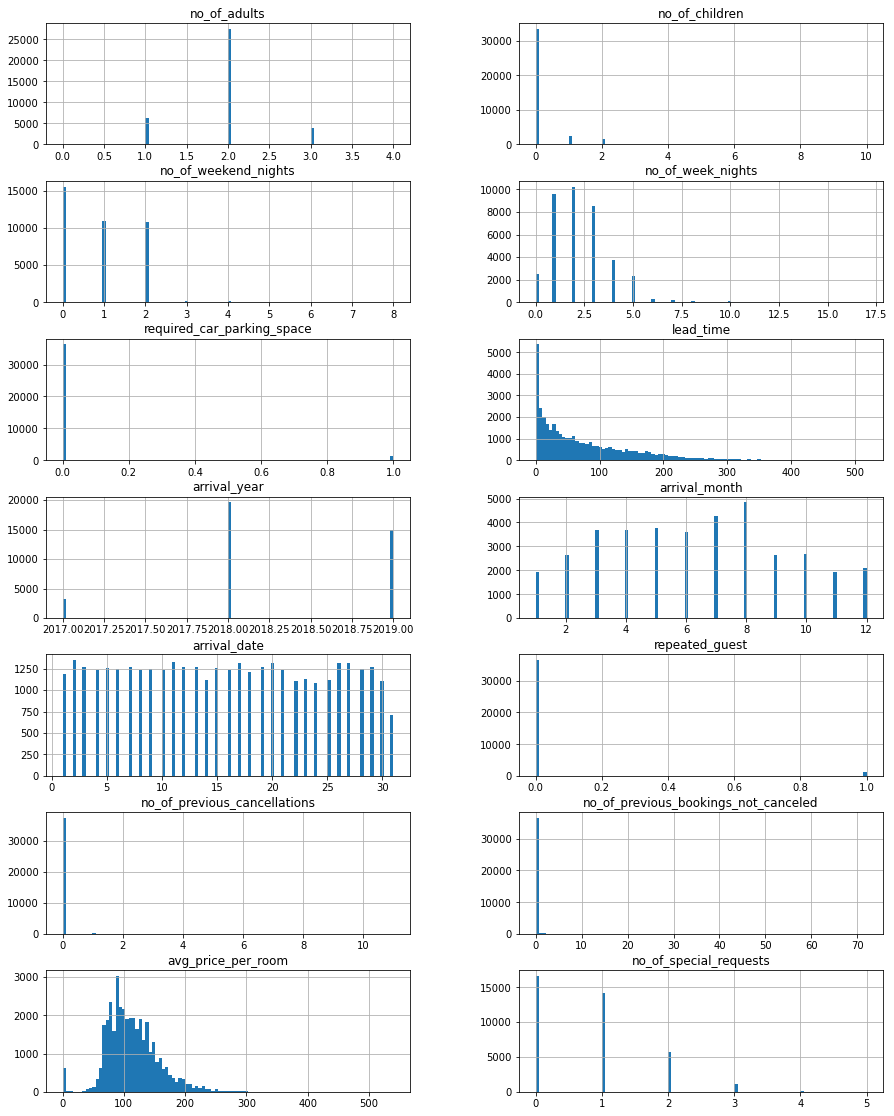

In [341]:
columns = list(pdata) # Histogram of first 14 columns
pdata[columns].hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2)); 

In [342]:
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x)  
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,37725.000,1.931,0.531,0.000,2.000,2.000,2.000,4.000
no_of_children,37725.000,0.155,0.479,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,37725.000,0.908,0.891,0.000,0.000,1.000,2.000,8.000
no_of_week_nights,37725.000,2.343,1.545,0.000,1.000,2.000,3.000,17.000
required_car_parking_space,37725.000,0.038,0.191,0.000,0.000,0.000,0.000,1.000
lead_time,37725.000,73.301,73.280,0.000,14.000,50.000,112.000,518.000
arrival_year,37725.000,2018.308,0.621,2017.000,2018.000,2018.000,2019.000,2019.000
arrival_month,37725.000,6.324,3.054,1.000,4.000,6.000,8.000,12.000
arrival_date,37725.000,15.655,8.824,1.000,8.000,16.000,23.000,31.000
repeated_guest,37725.000,0.034,0.181,0.000,0.000,0.000,0.000,1.000


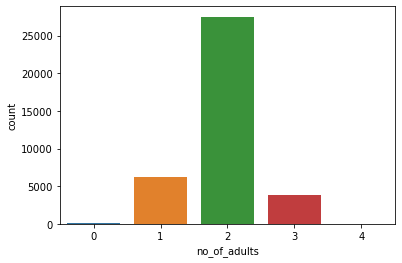

In [343]:
sns.countplot(data = pdata, x='no_of_adults')
plt.show()

* The reservation is mostly for two adults.

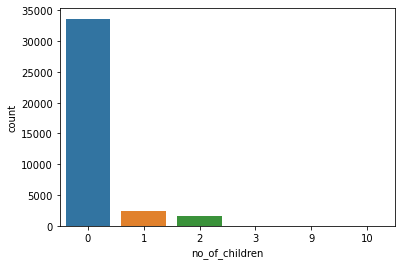

In [257]:
sns.countplot(data = pdata, x='no_of_children')
plt.show()

* most of the reservation is with no children

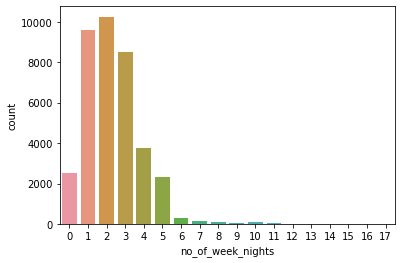

In [258]:
sns.countplot(data = pdata, x='no_of_week_nights')
plt.show()

A number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel. as you can see, 2, 1 and then 3 weeknights are on the top

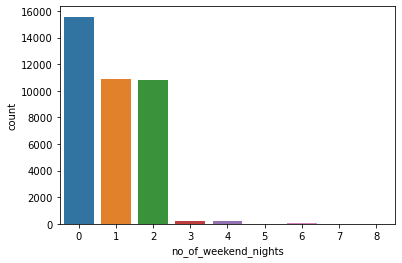

In [259]:
sns.countplot(data = pdata, x='no_of_weekend_nights')
plt.show()

A number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. As you see, most of the guests tend to do not book or stay at a hotel at the weekends.

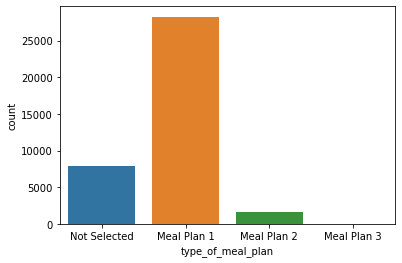

In [260]:
sns.countplot(data = pdata, x='type_of_meal_plan')
plt.show()

plot of type of meal plan booked by the customer shows us that most of them just booked for **Breakfast** (Meal plan 1)

In [261]:
pdata['type_of_meal_plan'].value_counts()

Meal Plan 1     28251
Not Selected     7839
Meal Plan 2      1627
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64

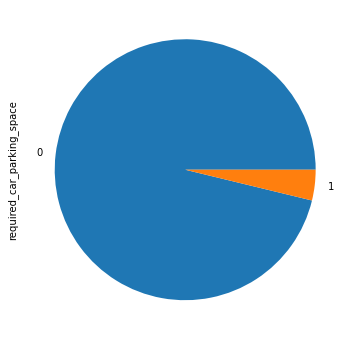

In [262]:
plt.figure(figsize=(10,6))
pdata['required_car_parking_space'].value_counts().plot(kind='pie');

Only a few customers require car parking space

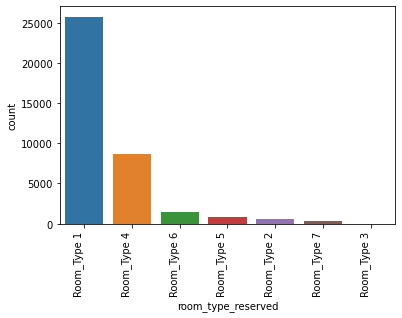

In [263]:
chart=sns.countplot(data = pdata, x='room_type_reserved')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light');

bar plot of type of room reserved by the customer shows that room type 1 is the most popular

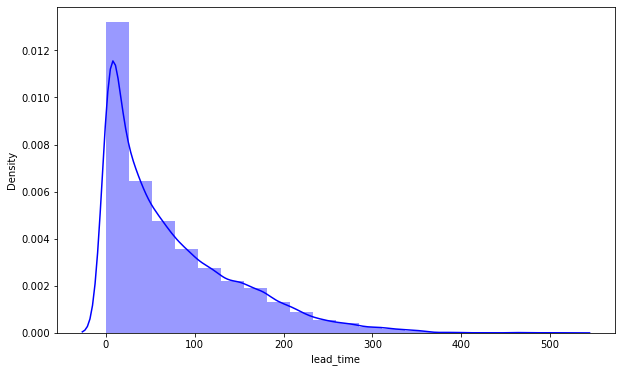

In [264]:
plt.figure(figsize=(10,6))
sns.distplot(pdata.lead_time,color="b",bins=20);

The number of days between the date of booking and the guest's arrival date is highly skewed to the right  It also shows that guests tend to book hotel rooms mostly between 1 to 100 days earlier.

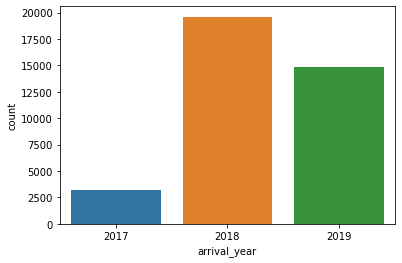

In [265]:
sns.countplot(data = pdata, x='arrival_year')
plt.show()

arrival date for 2018 is on the top

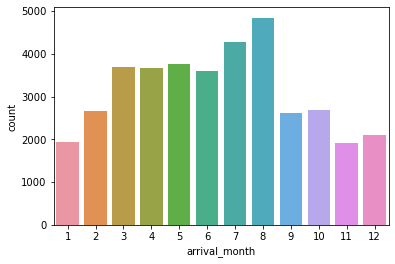

In [266]:
sns.countplot(data = pdata, x='arrival_month')
plt.show()

most of the reservations of hotel rooms are for the month of April to August. also first and the last two months have the lowest reservation.

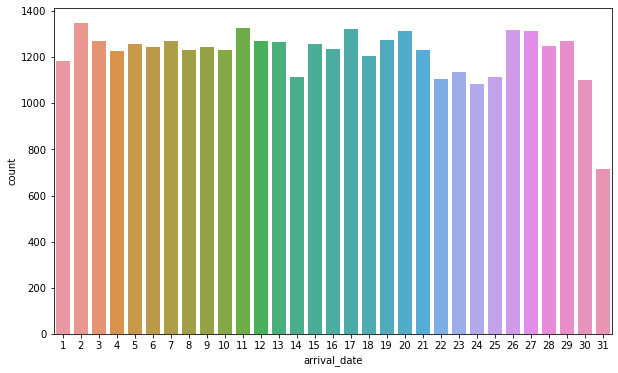

In [267]:
plt.figure(figsize=(10,6))
sns.countplot(data = pdata, x='arrival_date')
plt.show()

it seems that the guests do not book rooms very much for last day of month.

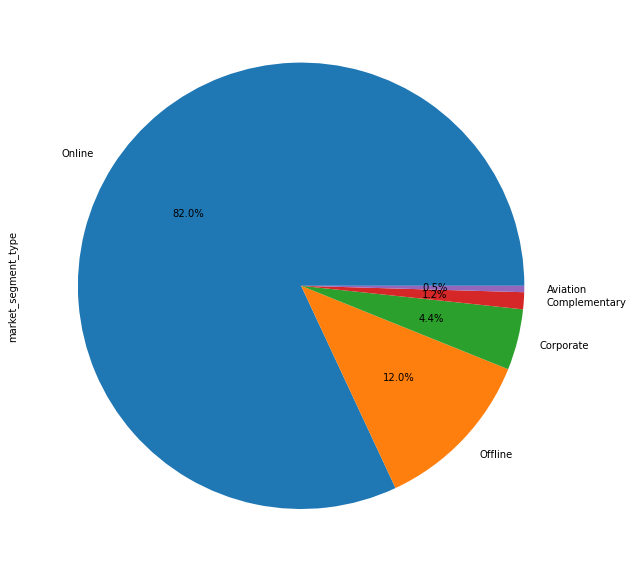

In [268]:
plt.figure(figsize=(10,15))
pdata['market_segment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

online market segment with 82% is on the top

after that offline with 12% has been located at the second place

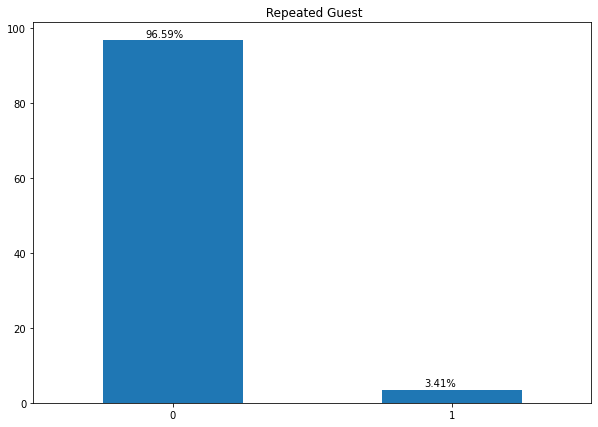

In [269]:
plt.figure(figsize=(10,7))
ax = (pdata.repeated_guest.value_counts()/len(pdata)*100).sort_index().plot(kind="bar", rot=0)
plt.title(" Repeated Guest")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

only 3.41% of the guests are repeated guest

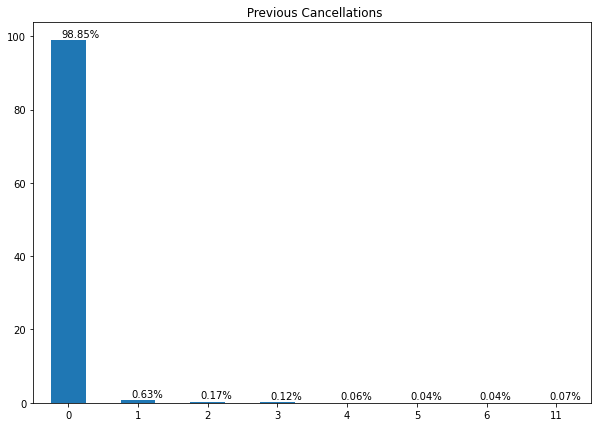

In [7]:
plt.figure(figsize=(10,7))
asd = (pdata.no_of_previous_cancellations.value_counts()/len(pdata)*100).sort_index().plot(kind="bar", rot=0)
plt.title(" Previous Cancellations")
for p in asd.patches:
     asd.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


almost all of the guests (99%) have no previous bookings that were canceled.

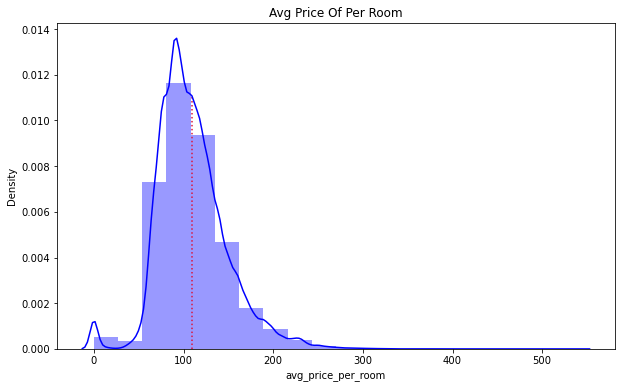

In [458]:
plt.figure(figsize=(10,6))
axx=sns.distplot(pdata.avg_price_per_room,color="b",bins=20)
mean = pdata['avg_price_per_room'].mean()
kdeline = axx.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Avg Price Of Per Room");

avg_price_per_room has a distribution skewed to the right, I think it looks like a normal distribution. its average is around 109 Euros.

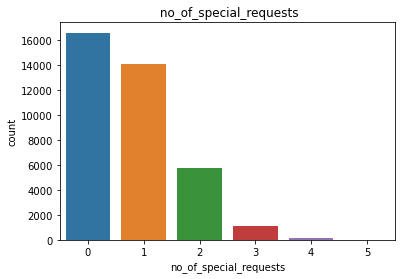

In [277]:
sns.countplot(data = pdata, x='no_of_special_requests')
plt.title(" no_of_special_requests")
plt.show()

In [278]:
pdata['no_of_special_requests'].value_counts()

0    16581
1    14117
2     5755
3     1120
4      138
5       14
Name: no_of_special_requests, dtype: int64

* Most of the customers had no special request (16581)
* After that there is 1 request with number of 14117

## Multivariate Data Analysis

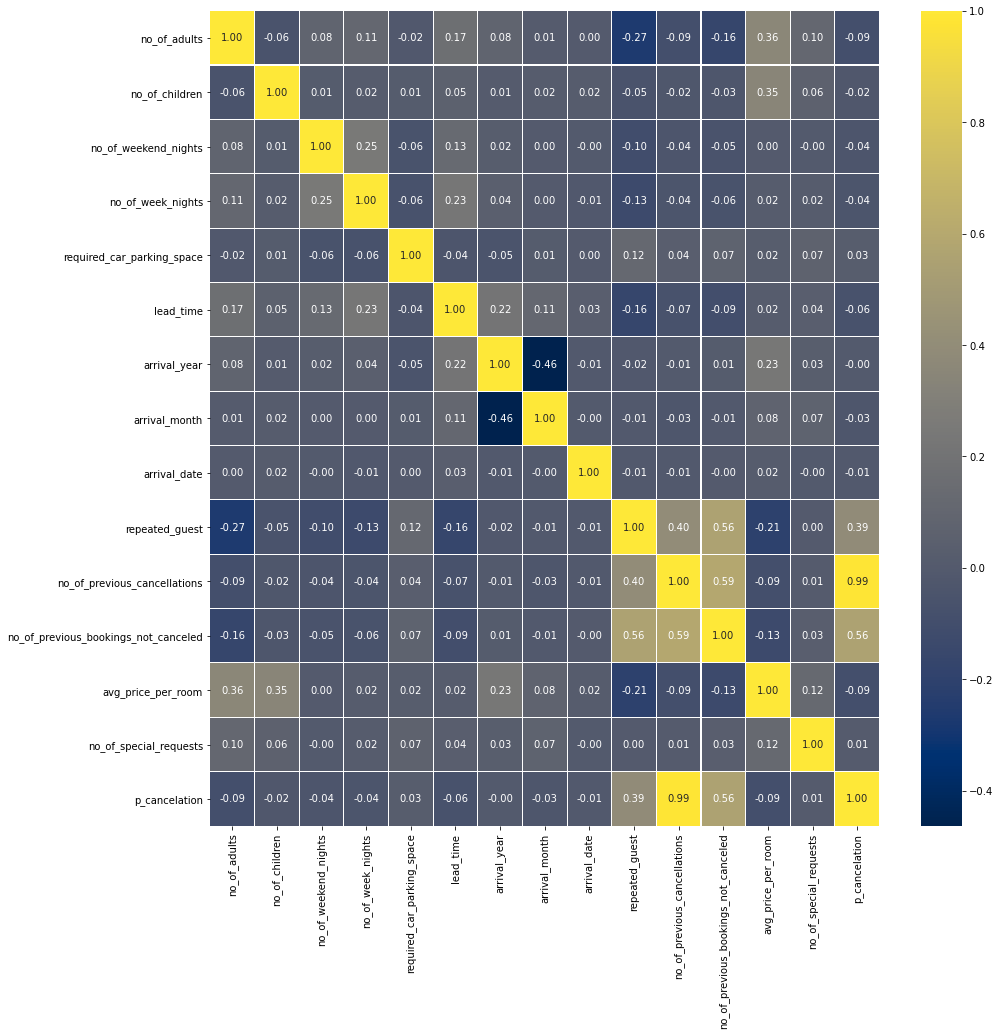

In [279]:
fig,ax = plt.subplots(figsize=(15,15))   
sns.heatmap(pdata.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="cividis") 
plt.show()

it seems that arrival_year and arrival month have correlation

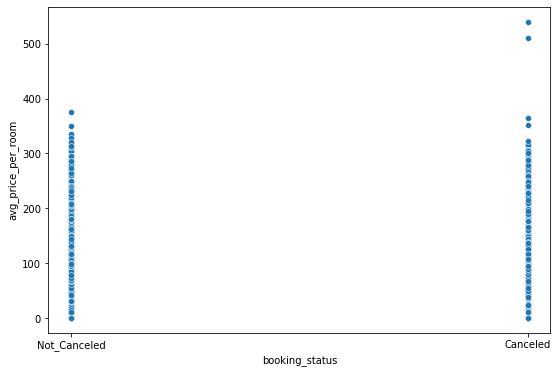

In [280]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='booking_status', y='avg_price_per_room',data=pdata,palette= "Paired");

* the rooms with higher price have more cancelation 

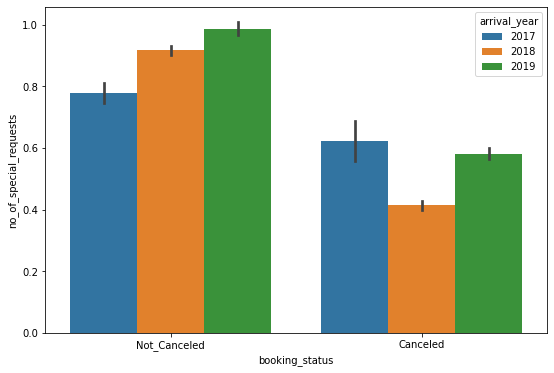

In [281]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='no_of_special_requests',hue=pdata['arrival_year']);


difference between booking status and the number of special requests in different years.
Totally, in 2019 booking the rooms with no cancelation and more number of requests are higher than others.
in 2017 booking the rooms and its cancelation (with high special request) are higher than others.

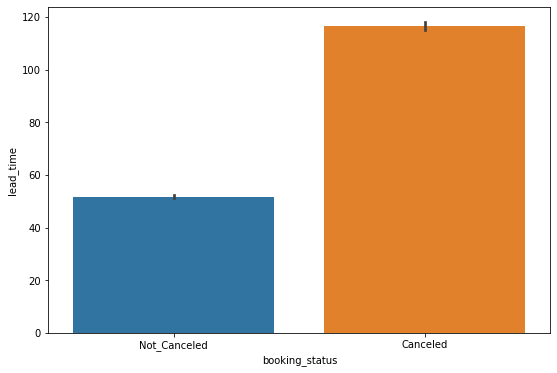

In [282]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='lead_time');

The more the lead time, the more cancelation it is.

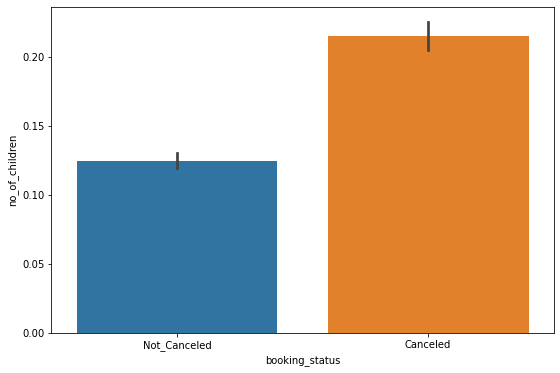

In [283]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='no_of_children');

Guests who have more children did cancel their reservations more than others.

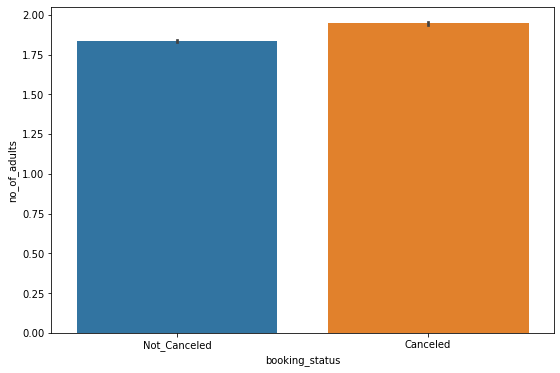

In [152]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='no_of_adults');

it seems that nomber of adult has no effect on cancelation

In [285]:
# I figured out that the type of columns that are related to date are integer. after trying to convert them and 
# got some errors, it was found that we have February 29 in year 2018 which is not correct. here I fix the problem
pdata['arrival_date']=np.where((pdata['arrival_month']==2)& (pdata['arrival_date']==29),28,pdata['arrival_date'])


In [286]:
df_ = pdata[['arrival_year','arrival_month','arrival_date']].copy()
df_.columns = ['year', 'month' , 'day']

pdata['date']=pd.to_datetime(df_)

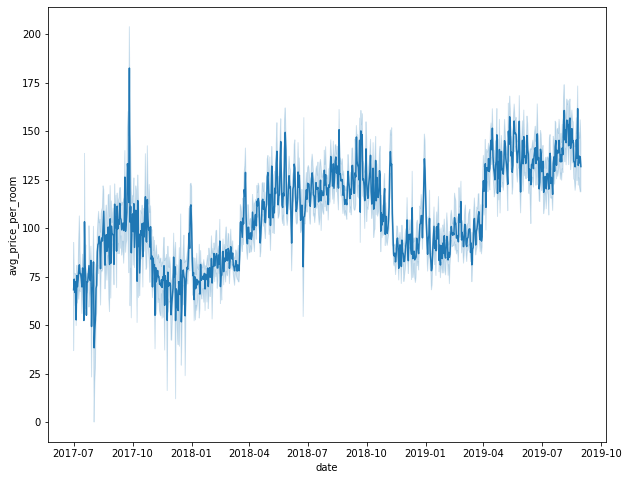

In [287]:
plt.figure(figsize=(10,8))
sns.lineplot(data=pdata, x="date", y="avg_price_per_room");


There is a increasing in price of per room between 2017 to 2019 with a mild slope

# The Questions

## What are the busiest months in the hotel?

In [288]:
pdata['arrival_month'].value_counts()

8     4839
7     4268
5     3755
3     3688
4     3676
6     3600
10    2677
2     2655
9     2622
12    2093
1     1931
11    1921
Name: arrival_month, dtype: int64

 ##### The August and July are the busiest months

## Which market segment do most of the guests come from?


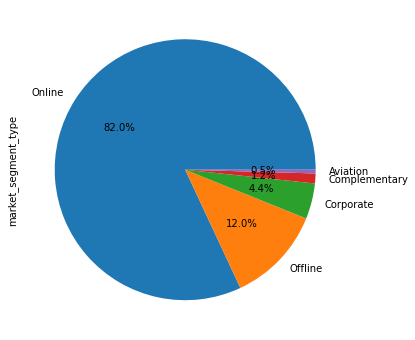

In [290]:
plt.figure(figsize=(8,6))
pdata['market_segment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

##### as I showed it before, the most of the guests come from online segment

## Hotel rates are dynamic and change according to demand and customer demographics.What are the differences in room prices in different market segments?


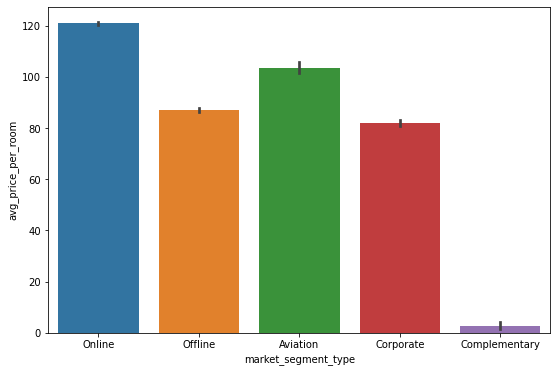

In [291]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='market_segment_type',y='avg_price_per_room');

##### The online and complementary market segments have the highest and lowest average price, respectively.

## What percentage of bookings are canceled?


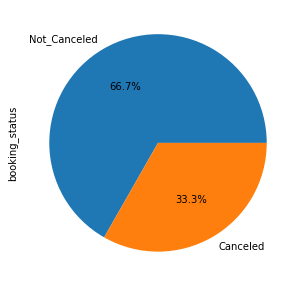

In [292]:
plt.figure(figsize=(6,5))
pdata['booking_status'].value_counts().plot(kind='pie',autopct='%1.1f%%');

##### 33.3% of guests did canceled their books.

## Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

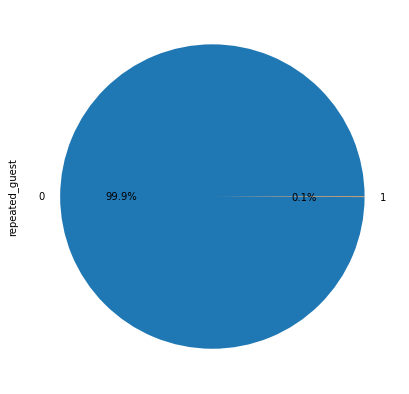

In [293]:
ff=pdata[pdata['booking_status']=='Canceled']
#ff['repeated_guest'].value_counts()
plt.figure(figsize=(8,7))
ff['repeated_guest'].value_counts().plot(kind='pie',autopct='%1.1f%%');

In [294]:
ff=pdata[pdata['booking_status']=='Canceled']

ff.repeated_guest.value_counts(normalize=True)

0   0.999
1   0.001
Name: repeated_guest, dtype: float64

##### less than 1% of repeated guests cancel their reservations

### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

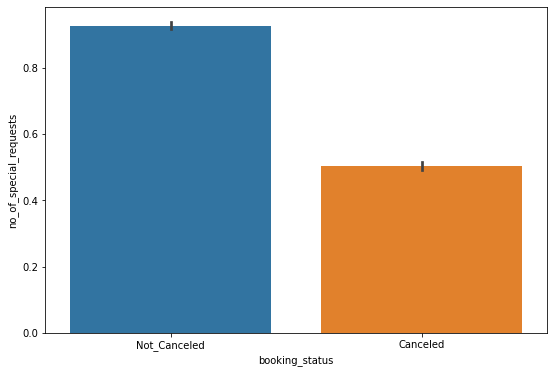

In [295]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='no_of_special_requests');


##### It seems that guests who have high special requirements tend to do not to cancel their books.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [99]:
numeric_columns = pdata.select_dtypes(include=np.number).columns.tolist()

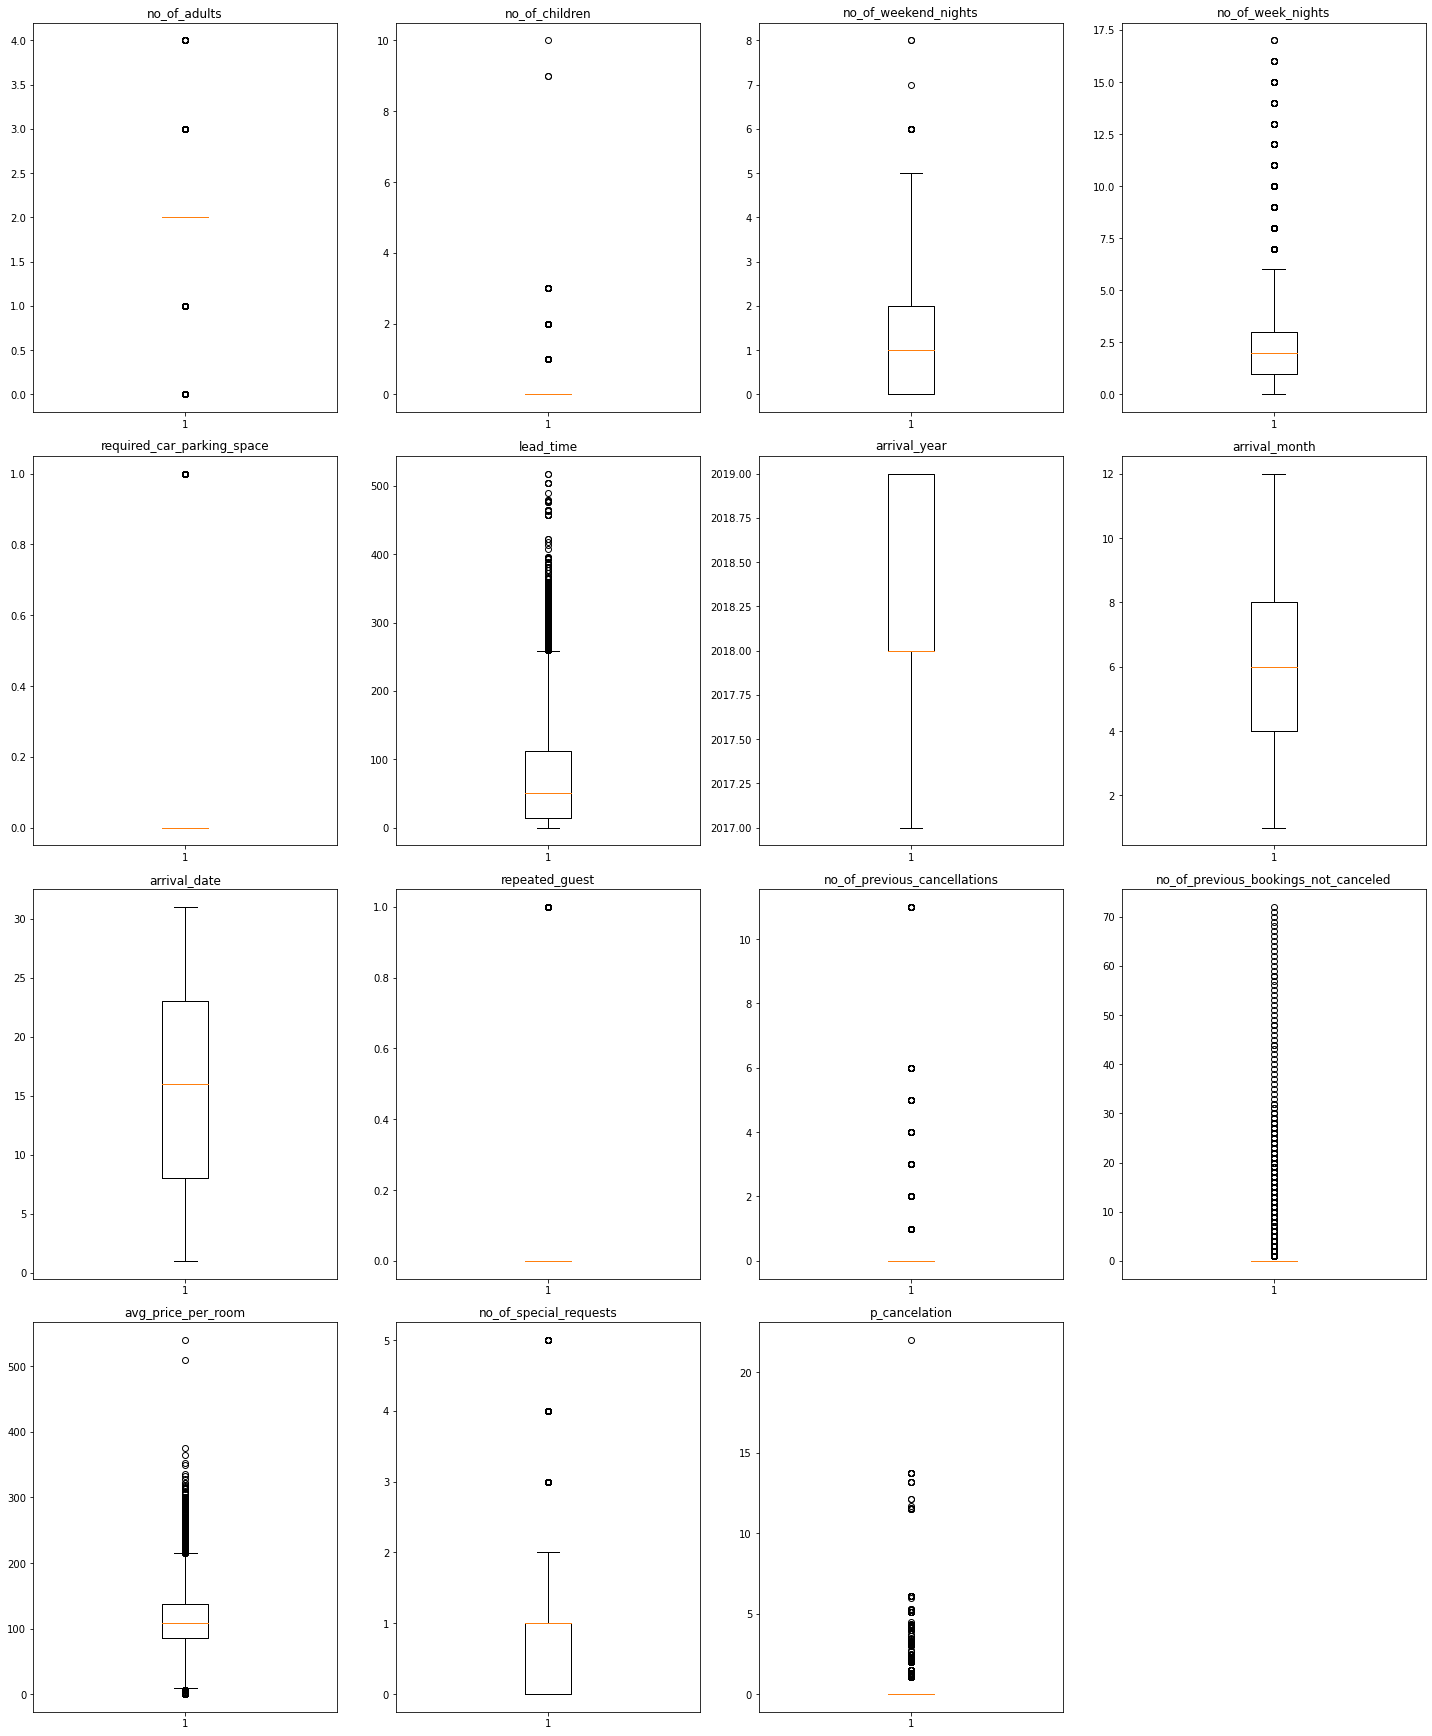

In [297]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(pdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [100]:
def treat_outliers(pdata, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = pdata[col].quantile(0.25)  # 25th quantile
    Q3 = pdata[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    pdata[col] = np.clip(pdata[col], Lower_Whisker, Upper_Whisker)

    return pdata


def treat_outliers_all(pdata, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
         if (c!='no_of_adults')& (c!='no_of_children')& (c!='required_car_parking_space')&(c!='required_car_parking_space')& (c!='repeated_guest')& (c!='no_of_previous_cancellations')&(c!='no_of_previous_bookings_not_canceled'):
            pdata = treat_outliers(pdata, c)

    return pdata

In [101]:
# treating the outliers
numerical_col = pdata.select_dtypes(include=np.number).columns.tolist()
pdata = treat_outliers_all(pdata, numerical_col)

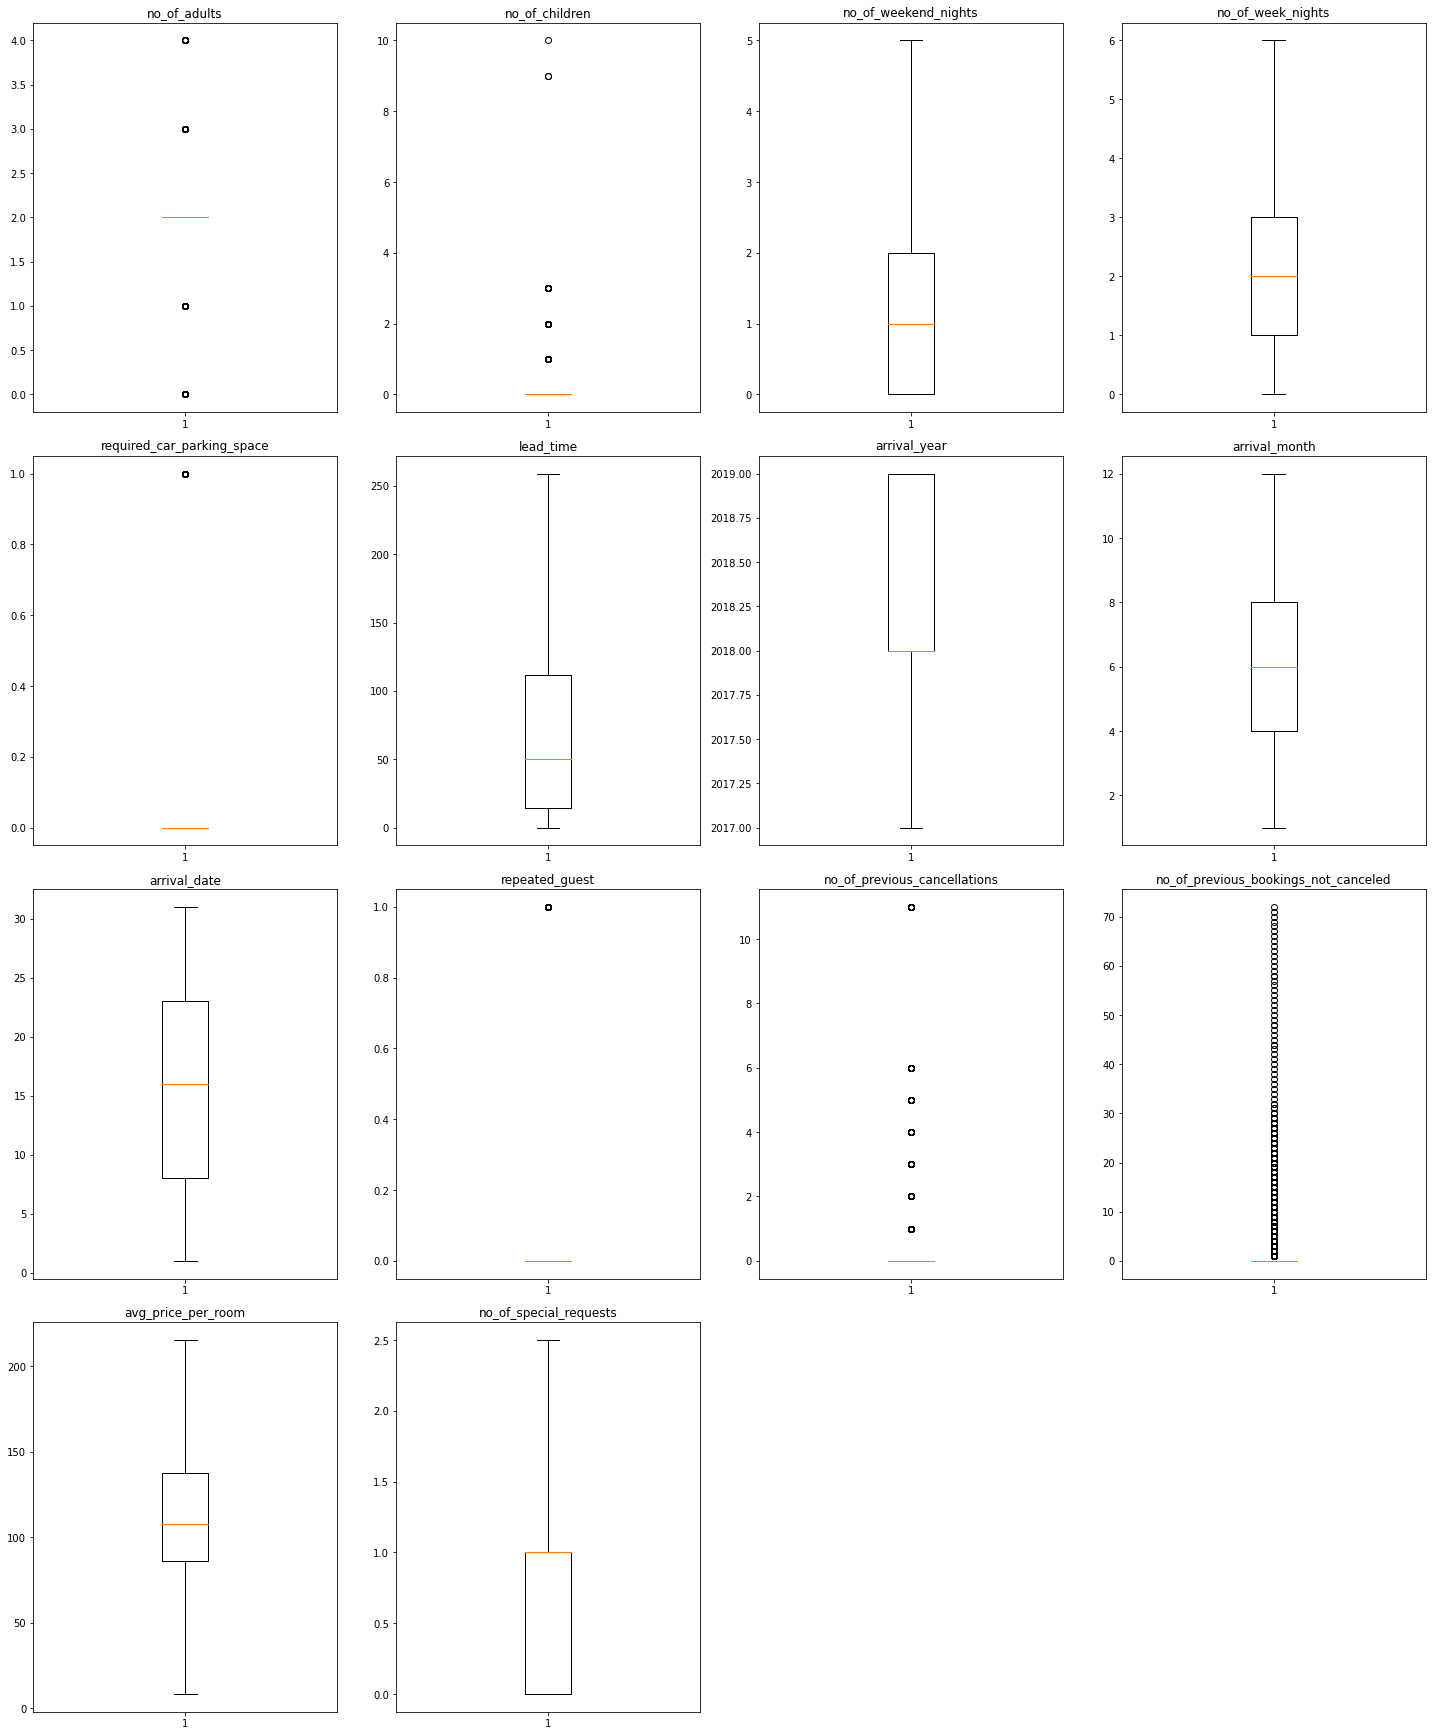

In [27]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(pdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [102]:
pdata["booking_status"] = pdata["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [103]:
#Create Dummy Variables for 3 columns

df= pd.get_dummies(pdata, columns=['type_of_meal_plan','room_type_reserved','market_segment_type'])

### Creating training and test sets.

In [104]:
X = df.drop(["booking_status","market_segment_type_Aviation","room_type_reserved_Room_Type 7","type_of_meal_plan_Meal Plan 2"], axis=1)
Y = df["booking_status"]

X =pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1,stratify=df['booking_status'])


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [105]:
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x)  
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,37725.000,1.931,0.531,0.000,2.000,2.000,2.000,4.000
no_of_children,37725.000,0.155,0.479,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,37725.000,0.907,0.886,0.000,0.000,1.000,2.000,5.000
no_of_week_nights,37725.000,2.305,1.390,0.000,1.000,2.000,3.000,6.000
required_car_parking_space,37725.000,0.038,0.191,0.000,0.000,0.000,0.000,1.000
lead_time,37725.000,72.143,69.574,0.000,14.000,50.000,112.000,259.000
arrival_year,37725.000,2018.308,0.621,2017.000,2018.000,2018.000,2019.000,2019.000
arrival_month,37725.000,6.324,3.054,1.000,4.000,6.000,8.000,12.000
arrival_date,37725.000,15.655,8.824,1.000,8.000,16.000,23.000,31.000
repeated_guest,37725.000,0.034,0.181,0.000,0.000,0.000,0.000,1.000


In [106]:
pdata.shape# 14350 rows have been deleted.

(37725, 18)

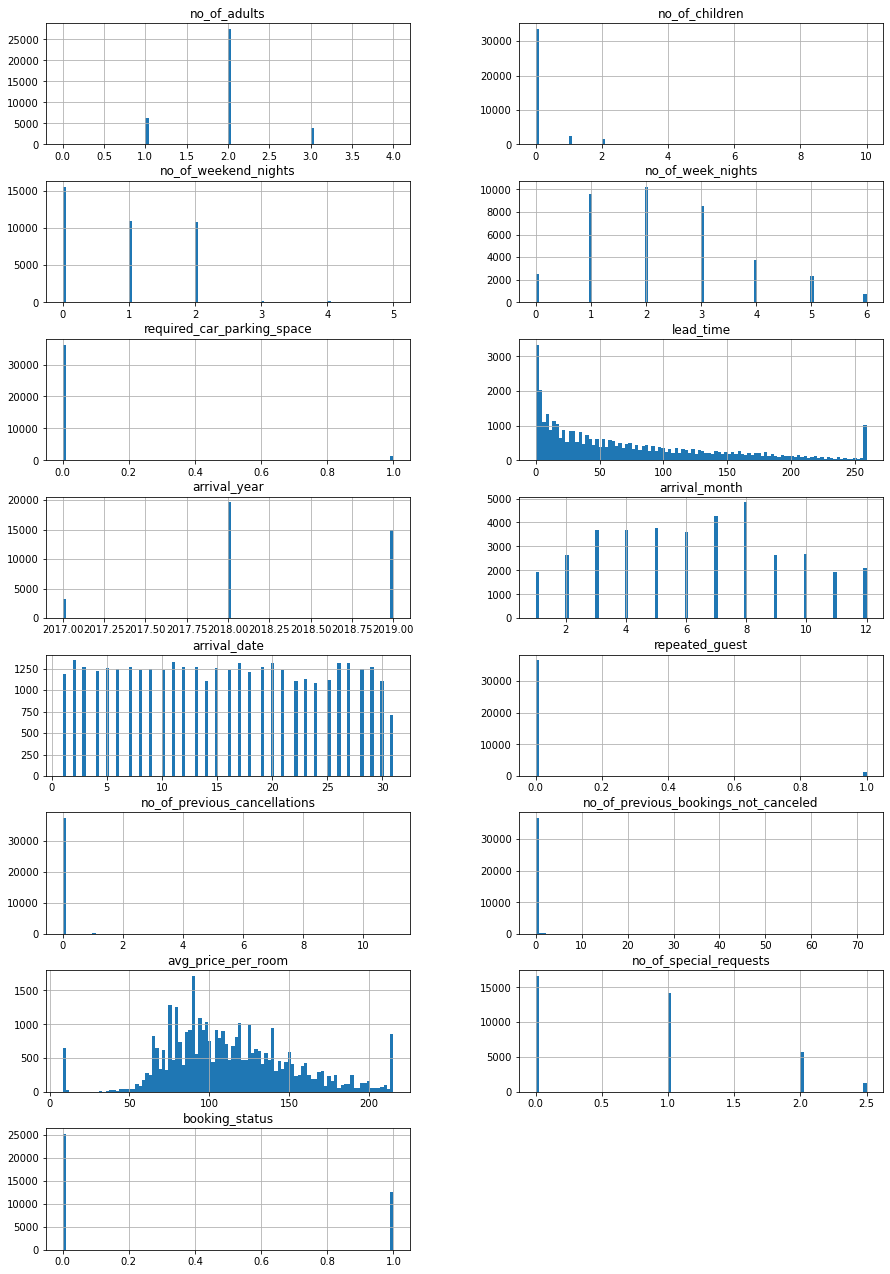

In [13]:
columns = list(pdata) # Histogram of first 14 columns
pdata[columns].hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2)); 

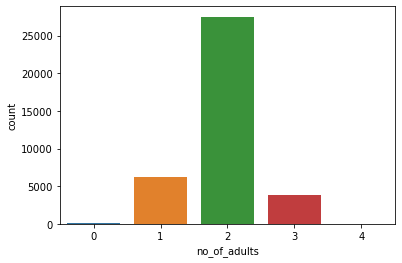

In [14]:
sns.countplot(data = pdata, x='no_of_adults')
plt.show()

guests with a number of 2 are higher

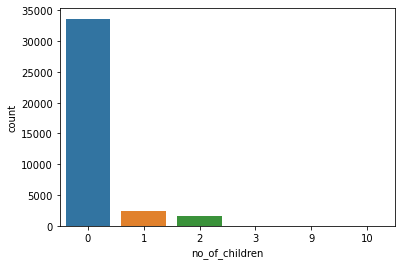

In [843]:
sns.countplot(data = pdata, x='no_of_children')
plt.show()

there is no change here. still, booking with no child is on the top

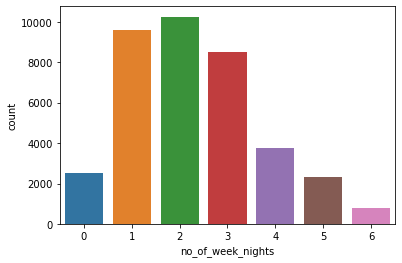

In [844]:
sns.countplot(data = pdata, x='no_of_week_nights')
plt.show()

after dealing with outliers it is still 2, 1, and then 3 weeknights which are on the top.

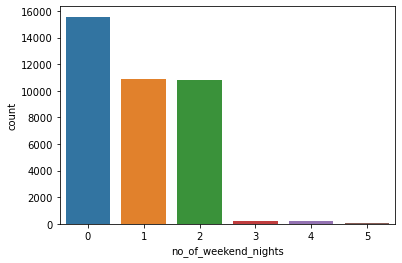

In [845]:
sns.countplot(data = pdata, x='no_of_weekend_nights')
plt.show()

as you see, most of the guests tend to do not book or stay at a hotel at the weekends.

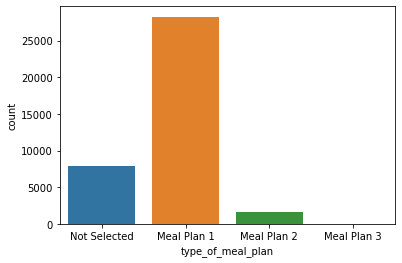

In [846]:
sns.countplot(data = pdata, x='type_of_meal_plan')
plt.show()

The plot of type of meal plan booked by the customer shows us that most of them still booked for Breakfast (Meal plan 1)

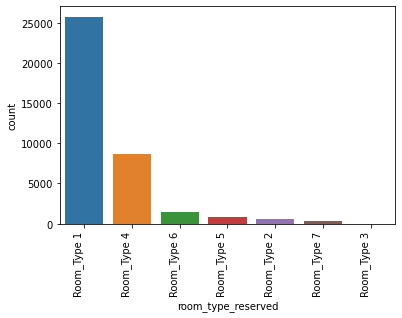

In [310]:
chart=sns.countplot(data = pdata, x='room_type_reserved')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light');

no changes in `room_type_reserved`

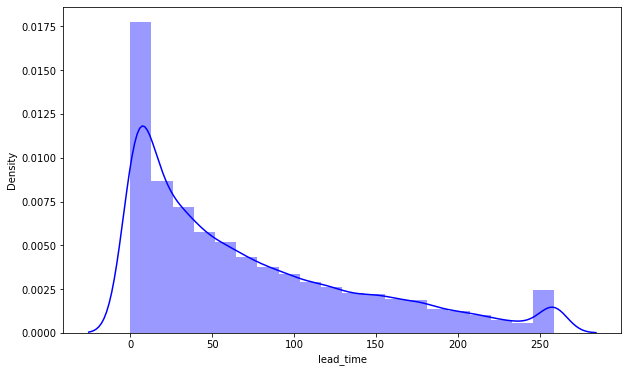

In [311]:
plt.figure(figsize=(10,6))
sns.distplot(pdata.lead_time,color="b",bins=20);

the skewness of column `lead_time` is still to the right.

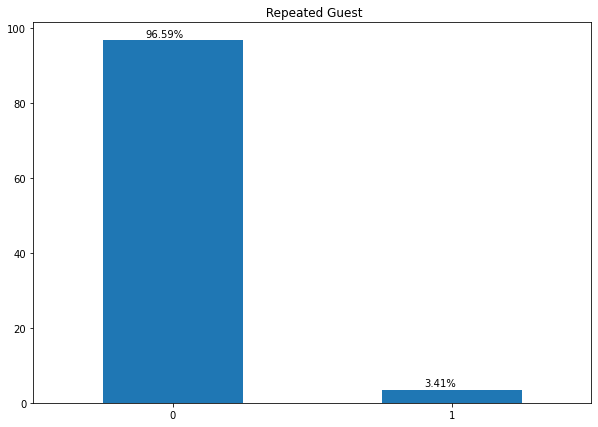

In [312]:
plt.figure(figsize=(10,7))
ax = (pdata.repeated_guest.value_counts()/len(pdata)*100).sort_index().plot(kind="bar", rot=0)
plt.title(" Repeated Guest")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

there is no changes. Still 3.41% of the guests are repeated guest

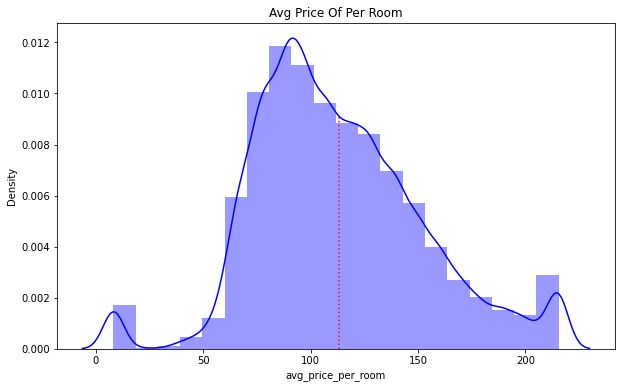

In [14]:
plt.figure(figsize=(10,6))
axx=sns.distplot(pdata.avg_price_per_room,color="b",bins=20)
mean = pdata['avg_price_per_room'].mean()
kdeline = axx.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Avg Price Of Per Room");

after dealing with outliers its skewness is better and still its mean is around 113.154 Euro

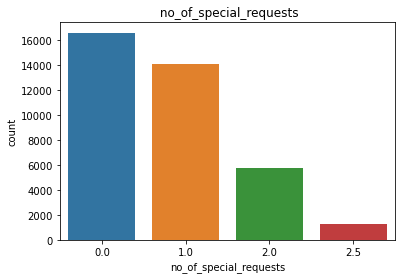

In [314]:
sns.countplot(data = pdata, x='no_of_special_requests')
plt.title(" no_of_special_requests")
plt.show()

Most of the customers had no special request

## Multivariate Data Analysis

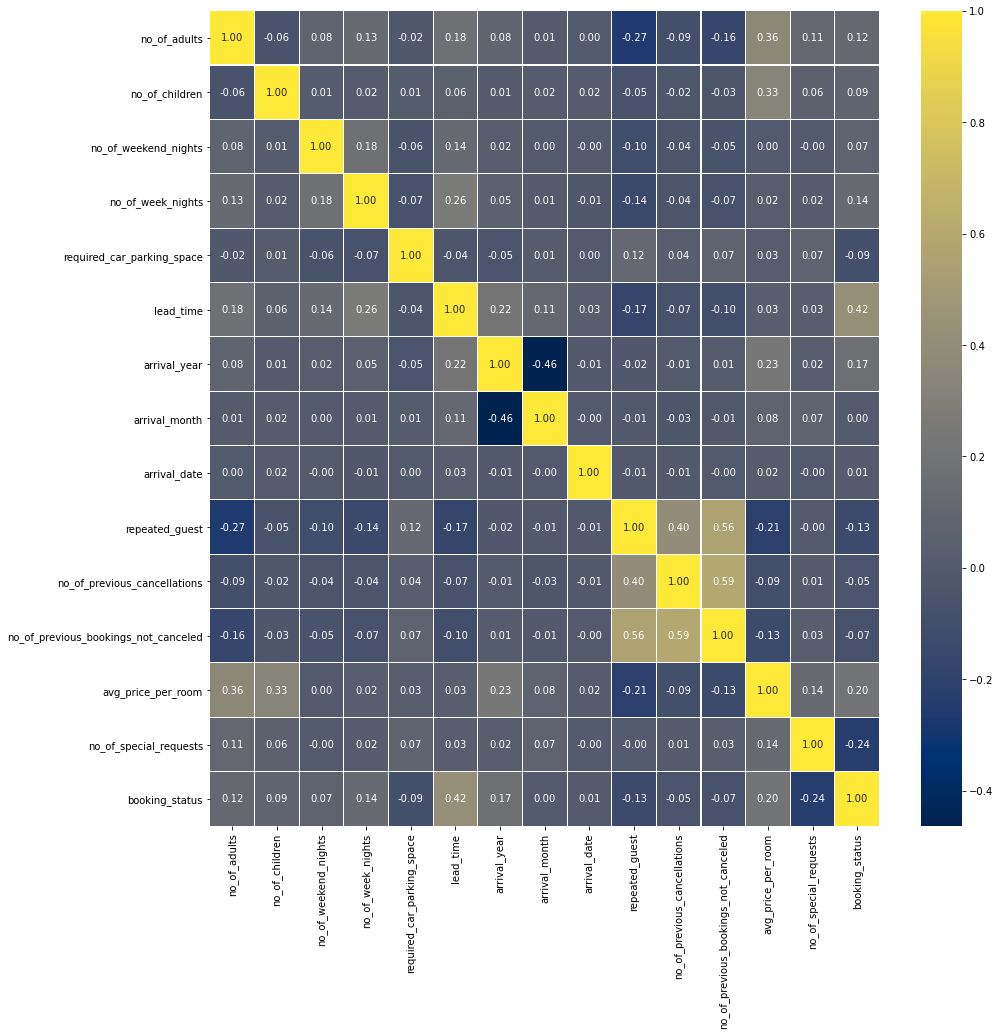

In [15]:
fig,ax = plt.subplots(figsize=(15,15))   
sns.heatmap(pdata.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="cividis") 
plt.show()

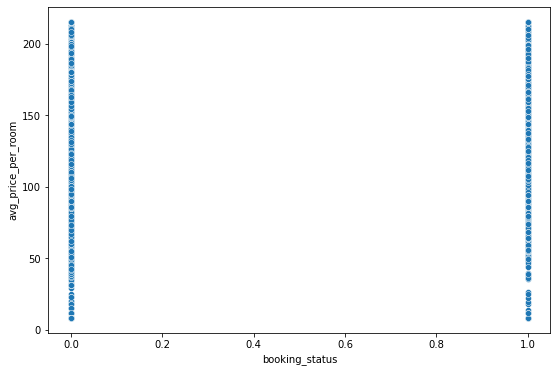

In [316]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='booking_status', y='avg_price_per_room',data=pdata,palette= "Paired");

There is no differences between cancelation of rooms with different prices.

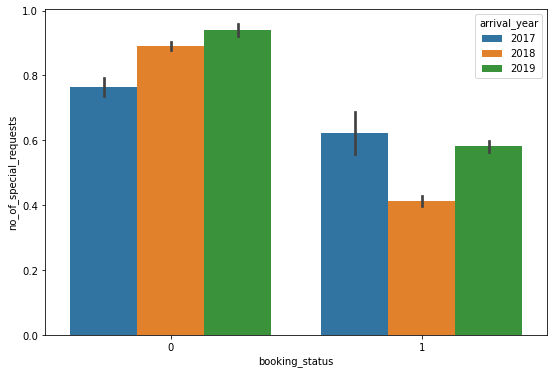

In [317]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='no_of_special_requests',hue=pdata['arrival_year']);

I can't see any differences here from before deleting the outliers.

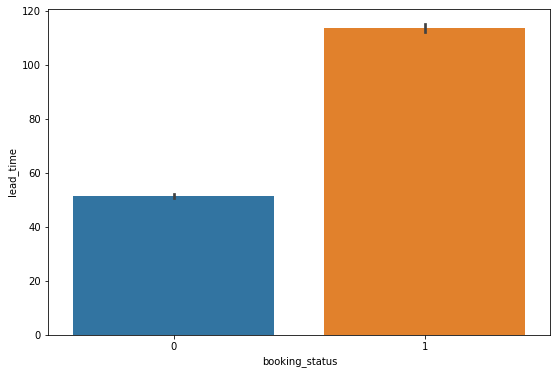

In [318]:
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='lead_time');

The more the lead time, the more cancelation it is.

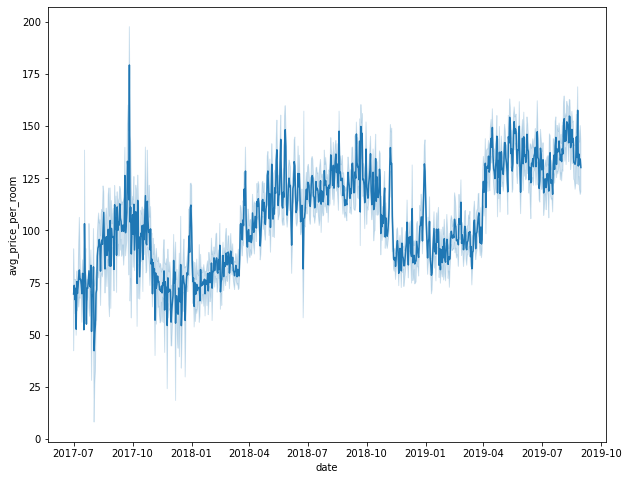

In [319]:
plt.figure(figsize=(10,8))
sns.lineplot(data=pdata, x="date", y="avg_price_per_room");

In [320]:
#What are the busiest months in the hotel? busiest months in the hotel are still August and July
pdata['arrival_month'].value_counts()

8     4839
7     4268
5     3755
3     3688
4     3676
6     3600
10    2677
2     2655
9     2622
12    2093
1     1931
11    1921
Name: arrival_month, dtype: int64

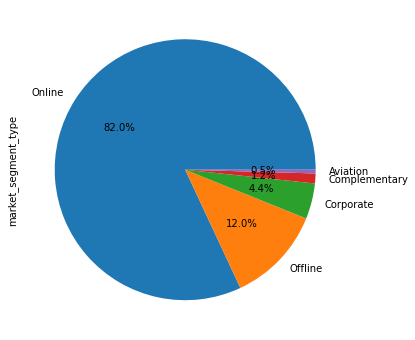

In [321]:
# Which market segment do most of the guests come from?
plt.figure(figsize=(8,6))
pdata['market_segment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

it is still Online market segment which is on top

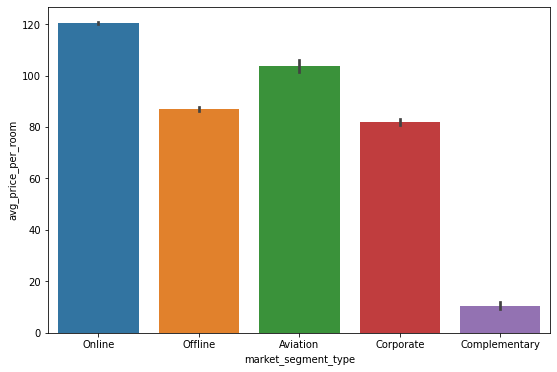

In [322]:
#Hotel rates are dynamic and change according to demand and customer demographics.What are the differences in room prices in different market segments?¶
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='market_segment_type',y='avg_price_per_room');

The online and complementary market segments have the highest and lowest average price, respectively.

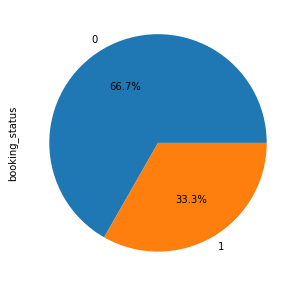

In [323]:
#What percentage of bookings are canceled?
plt.figure(figsize=(6,5))
pdata['booking_status'].value_counts().plot(kind='pie',autopct='%1.1f%%');

33.3% of bookings have been canceled

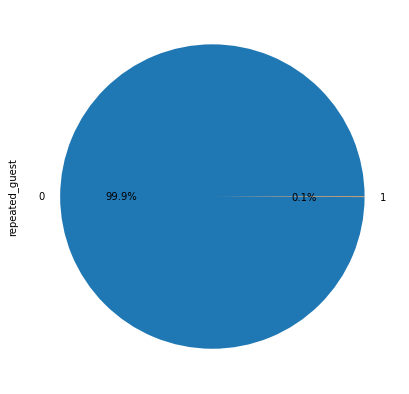

In [326]:
#Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
ff=pdata[pdata['booking_status']==1]
#ff['repeated_guest'].value_counts()
plt.figure(figsize=(8,7))
ff['repeated_guest'].value_counts().plot(kind='pie',autopct='%1.1f%%');

almost none of them cancel their reservations :(0.1%)

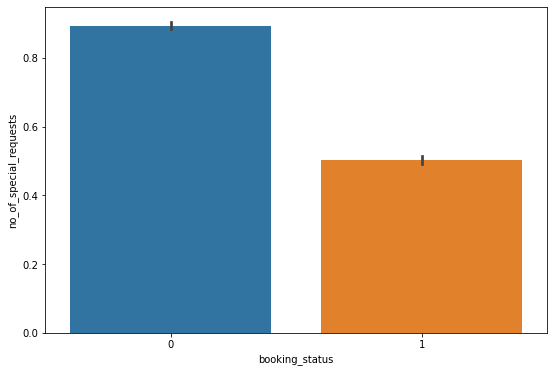

In [327]:
#Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
plt.figure(figsize=(9,6))
sns.barplot(data = pdata, x='booking_status',y='no_of_special_requests');

It seems that guests who have high special requirements tend to do not to cancel their books.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [107]:

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                            20.830
no_of_children                           2.321
no_of_weekend_nights                     2.184
no_of_week_nights                        4.241
required_car_parking_space               1.079
lead_time                                2.440
arrival_year                           444.217
arrival_month                            5.506
arrival_date                             4.171
repeated_guest                           2.218
no_of_previous_cancellations             1.565
no_of_previous_bookings_not_canceled     1.948
avg_price_per_room                      20.458
no_of_special_requests                   2.162
type_of_meal_plan_Meal Plan 1           19.259
type_of_meal_plan_Meal Plan 3            1.033
type_of_meal_plan_Not Selected           6.646
room_type_reserved_Room_Type 1          98.447
room_type_reserved_Room_Type 2           3.412
room_type_reserved_Room_Type 3           1.028
room_type_reserved_Room_T

`arrival_year, market_segment_type_Online, room_type_reserved_Room_Type 1` and some other columns  exhibit high multicollinearity. 
I will Remove arrival_year first to see which variable has a significant impact on the model's performance.

In [108]:
X_train1 = X_train.drop("arrival_year", axis=1)
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

no_of_adults                            20.677
no_of_children                           2.291
no_of_weekend_nights                     2.171
no_of_week_nights                        4.183
required_car_parking_space               1.079
lead_time                                2.439
arrival_month                            5.492
arrival_date                             4.135
repeated_guest                           2.173
no_of_previous_cancellations             1.565
no_of_previous_bookings_not_canceled     1.946
avg_price_per_room                      18.476
no_of_special_requests                   2.160
type_of_meal_plan_Meal Plan 1           17.389
type_of_meal_plan_Meal Plan 3            1.027
type_of_meal_plan_Not Selected           6.082
room_type_reserved_Room_Type 1          60.164
room_type_reserved_Room_Type 2           2.482
room_type_reserved_Room_Type 3           1.017
room_type_reserved_Room_Type 4          20.876
room_type_reserved_Room_T

Now dropping market_segment_type_Online, to see which variable has a significant impact on the model's performance.


In [109]:
X_train2= X_train1.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_adults                           19.341
no_of_children                          2.251
no_of_weekend_nights                    2.168
no_of_week_nights                       4.146
required_car_parking_space              1.078
lead_time                               2.433
arrival_month                           5.482
arrival_date                            4.116
repeated_guest                          2.165
no_of_previous_cancellations            1.563
no_of_previous_bookings_not_canceled    1.946
avg_price_per_room                     16.861
no_of_special_requests                  2.153
type_of_meal_plan_Meal Plan 1          16.032
type_of_meal_plan_Meal Plan 3           1.022
type_of_meal_plan_Not Selected          5.570
room_type_reserved_Room_Type 1         27.962
room_type_reserved_Room_Type 2          1.651
room_type_reserved_Room_Type 3          1.009
room_type_reserved_Room_Type 4         11.621
room_type_reserved_Room_Type 5          2.131

Now it is room_type_reserved_Room_Type 1 which has high VIF values so, I remove it

In [110]:
X_train3= X_train2.drop("room_type_reserved_Room_Type 1", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                           18.137
no_of_children                          2.224
no_of_weekend_nights                    2.146
no_of_week_nights                       4.020
required_car_parking_space              1.078
lead_time                               2.416
arrival_month                           5.364
arrival_date                            3.981
repeated_guest                          2.160
no_of_previous_cancellations            1.563
no_of_previous_bookings_not_canceled    1.946
avg_price_per_room                     15.193
no_of_special_requests                  2.148
type_of_meal_plan_Meal Plan 1          10.388
type_of_meal_plan_Meal Plan 3           1.022
type_of_meal_plan_Not Selected          3.509
room_type_reserved_Room_Type 2          1.114
room_type_reserved_Room_Type 3          1.001
room_type_reserved_Room_Type 4          1.775
room_type_reserved_Room_Type 5          1.130
room_type_reserved_Room_Type 6          1.996

Now it is no_of_adults 1 which has high VIF values(18.137)

In [111]:
X_train4= X_train3.drop("no_of_adults", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

no_of_children                          2.175
no_of_weekend_nights                    2.133
no_of_week_nights                       3.962
required_car_parking_space              1.078
lead_time                               2.333
arrival_month                           5.364
arrival_date                            3.965
repeated_guest                          2.156
no_of_previous_cancellations            1.562
no_of_previous_bookings_not_canceled    1.945
avg_price_per_room                     11.393
no_of_special_requests                  2.131
type_of_meal_plan_Meal Plan 1           8.879
type_of_meal_plan_Meal Plan 3           1.021
type_of_meal_plan_Not Selected          2.921
room_type_reserved_Room_Type 2          1.111
room_type_reserved_Room_Type 3          1.001
room_type_reserved_Room_Type 4          1.729
room_type_reserved_Room_Type 5          1.129
room_type_reserved_Room_Type 6          1.995
market_segment_type_Complementary       1.259

avg_price_per_room has high VIF values(11.393)

In [112]:
X_train5= X_train4.drop("avg_price_per_room", axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

no_of_children                         2.105
no_of_weekend_nights                   2.129
no_of_week_nights                      3.916
required_car_parking_space             1.074
lead_time                              2.333
arrival_month                          4.914
arrival_date                           3.826
repeated_guest                         2.155
no_of_previous_cancellations           1.562
no_of_previous_bookings_not_canceled   1.945
no_of_special_requests                 2.079
type_of_meal_plan_Meal Plan 1          7.078
type_of_meal_plan_Meal Plan 3          1.019
type_of_meal_plan_Not Selected         2.454
room_type_reserved_Room_Type 2         1.103
room_type_reserved_Room_Type 3         1.001
room_type_reserved_Room_Type 4         1.526
room_type_reserved_Room_Type 5         1.046
room_type_reserved_Room_Type 6         1.904
market_segment_type_Complementary      1.170
market_segment_type_Corporate          1.762
market_segment_type_

type_of_meal_plan_Meal Plan 1 has higher VIF values than 5 it is (7.078) so I will remove it.

In [113]:
X_train6= X_train5.drop("type_of_meal_plan_Meal Plan 1", axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series6))

Series before feature selection: 

no_of_children                         2.102
no_of_weekend_nights                   2.085
no_of_week_nights                      3.598
required_car_parking_space             1.072
lead_time                              2.325
arrival_month                          4.116
arrival_date                           3.292
repeated_guest                         2.152
no_of_previous_cancellations           1.561
no_of_previous_bookings_not_canceled   1.943
no_of_special_requests                 2.012
type_of_meal_plan_Meal Plan 3          1.018
type_of_meal_plan_Not Selected         1.399
room_type_reserved_Room_Type 2         1.100
room_type_reserved_Room_Type 3         1.001
room_type_reserved_Room_Type 4         1.483
room_type_reserved_Room_Type 5         1.044
room_type_reserved_Room_Type 6         1.902
market_segment_type_Complementary      1.163
market_segment_type_Corporate          1.724
market_segment_type_Offline            1.249
dtype: float64



In [114]:
X_test_1 = X_test[X_train6.columns]

## Building a Logistic Regression model

## Logistic Regression (with statsmodels library)

In [115]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [116]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [117]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train6.astype(float))
lg1 = logit.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                26407
Model:                          Logit   Df Residuals:                    26386
Method:                           MLE   Df Model:                           20
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.2949
Time:                        10:14:50   Log-Likelihood:                -11841.
converged:                      False   LL-Null:                       -16794.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2030      0.046      4.461      0.000       0.114       0.292
no_of_weekend_nights                    -0.0481      

The variables which have a high p-value mean that they are not significant therefore we can drop the complete variables

In [118]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train6.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train6[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [119]:
X_train7 = X_train6[selected_features]

In [120]:
logit2 = sm.Logit(y_train, X_train7.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                26407
Model:                          Logit   Df Residuals:                    26392
Method:                           MLE   Df Model:                           14
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.2867
Time:                        10:14:53   Log-Likelihood:                -11979.
converged:                       True   LL-Null:                       -16794.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                     0.2152      0.045      4.777      0.000       0.127       0.303
no_of_weekend_nights              -0.0460      0.018     -2.563      0.

Now no feature has p-value greater than 0.05, so we'll consider the features in X_train7 as the final ones and lg2 as final model.

### Observations

Coefficient of smarket_segment_type_Offline, required_car_parking_space,arrival_year, arrival_month, no_of_previous_cancellations, and no_of_special_requests are negative increase in these will lead to decrease in chances of a guest cancel the reservation.


Coefficient of no_of_weekend_nights, no_of_week_nights, lead_time, room_type_reserved_Room_Type 4 & 1,avg_price_per_room ,type_of_meal_plan_Not Selected , market_segment_type_Online, are positive an increase in these will lead to increase in chances of a guest cancel the reservation.

#### Converting coefficients to odds

In [121]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train7.columns).T

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_special_requests,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,market_segment_type_Corporate,market_segment_type_Offline
Odds,1.240,0.955,0.973,0.237,1.017,0.934,0.984,0.117,0.271,0.489,1.214,1.726,1.663,0.185,0.064
Change_odd%,24.005,-4.495,-2.688,-76.314,1.651,-6.590,-1.625,-88.264,-72.921,-51.090,21.380,72.554,66.273,-81.504,-93.551


#### Coefficient interpretations
* no_of_children: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a cancelation by 1.2 times or a 24.0% increase in odds of cancel the book.

* no_of_weekend_nights: Holding all other features constant a 1 unit change in the no_of_weekend_nights will decrease the odds of a guest cancel the book by 0.95 times or a decrease of 4.49% decrease in odds of a guest cancel the book.

* no_of_week_nights: Holding all other features constant a 1 unit change in no_of_week_nights will decrease the odds of a cancelation by 0.97 times or a 2.68% decrease in odds of cancel the book.

* required_car_parking_space: Holding all other features constant a 1 unit change in required_car_parking_space will decrease the odds of a cancelation by 0.23 times or a 76.3% decrease in odds of cancel the book.

* lead_time: Holding all other features constant a 1 unit change in lead_time will increase the odds of a cancelation by 0.93 times or a 6.5% increase in odds of cancel the book.

* arrival_month: Holding all other features constant a 1 unit change in arrival_month will decrease the odds of a cancelation by 0.94 times or a 5.0% decrease in odds of cancel the book.

* no_of_previous_cancellations: Holding all other features constant a 1 unit change in no_of_previous_cancellations will decrease the odds of a cancelation by 0.117 times or a 88.0% decrease in odds of cancel the book

`Interpretation for other attributes can be done similarly.`


### Checking model performance on the training set

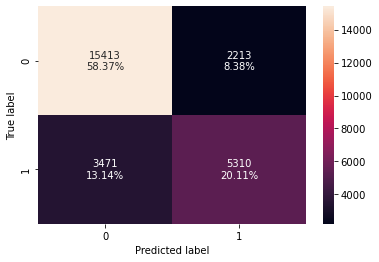

In [122]:
confusion_matrix_statsmodels(lg2, X_train7, y_train)

The confusion matrix

True Positives (TP): we correctly predicted that they do NOT CANCEL 58.37%

True Negatives (TN): we correctly predicted that they do CANCEL 20.11%

False Positives (FP): we incorrectly predicted that they do CANCEL (a "Type I error") 2213 Falsely predict positive Type I error (8.38%)

False Negatives (FN): we incorrectly predicted that they don't CANCEL (a "Type II error") 3471 Falsely predict negative Type II error(13.14%)

In [123]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train7, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.785,0.605,0.706,0.651


## ROC-AUC

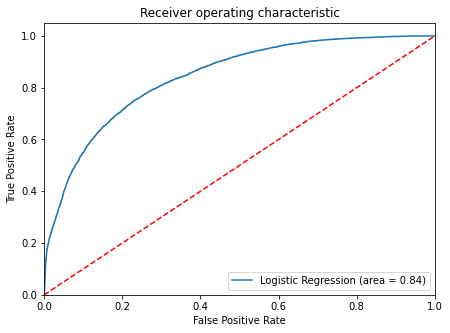

In [124]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train7))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train7))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve

## Optimal threshold using AUC-ROC curve

In [125]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train7))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36960342850037675


#### Checking model performance on training set

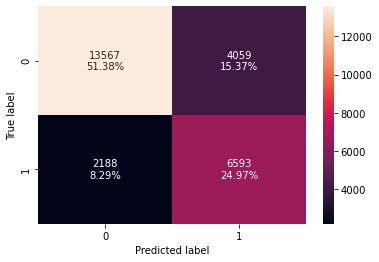

In [126]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train7, y_train, threshold=optimal_threshold_auc_roc
)

In [127]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train7, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.763,0.751,0.619,0.679


Precision and Accuracy of model have decreased but the other metrics have increased.
The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

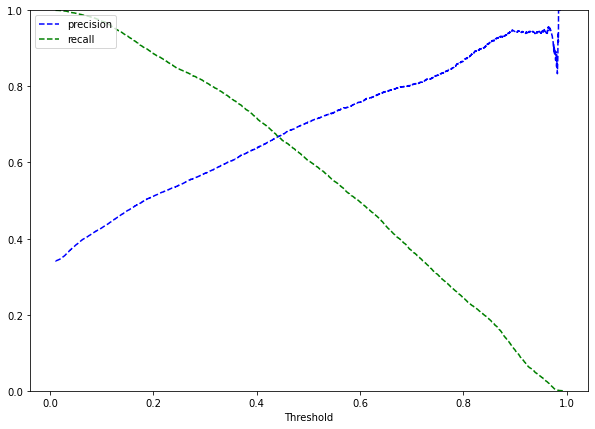

In [128]:
y_scores = lg2.predict(X_train7)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of 0.51, we get balanced recall and precision.

In [129]:
# setting the threshold
optimal_threshold_curve = 0.51

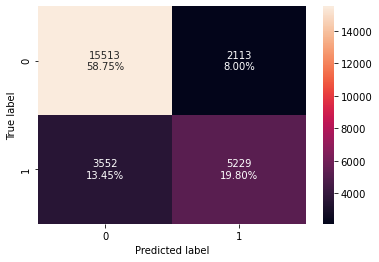

In [130]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train7, y_train, threshold=optimal_threshold_curve)

In [131]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train7, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.785,0.595,0.712,0.649


Model is performing well on training set.
There's not much improvement in the model performance as the default threshold is 0.36 and here we get 0.51 as the optimal threshold.

## Final Model Summary

In [137]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodels",
    "Logistic Regression 0.36 Threshold",
    "Logistic Regression 0.51 Threshold",
    
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodels,Logistic Regression 0.36 Threshold,Logistic Regression 0.51 Threshold
Accuracy,0.785,0.763,0.785
Recall,0.605,0.751,0.595
Precision,0.706,0.619,0.712
F1,0.651,0.679,0.649


All the logistic regression models have given a generalized performance on the training set.
Recall score shows the best result on logestic regression 0.36 threshold (0.75).

### Let's check the performance on the test set

In [138]:
X_test1 = X_test[list(X_train7.columns)]

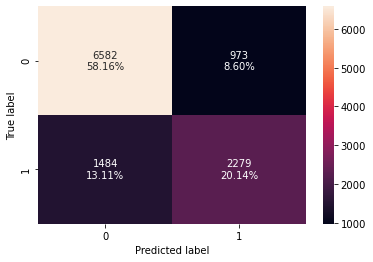

In [139]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test)

The confusion matrix

True Positives (TP): we correctly predicted that they do NOT CANCEL 58.16%

True Negatives (TN): we correctly predicted that they do CANCEL 20.14%

False Positives (FP): we incorrectly predicted that they do CANCEL (a "Type I error") 937 Falsely predict positive Type I error (8.60%)

False Negatives (FN): we incorrectly predicted that they don't CANCEL (a "Type II error") 1484 Falsely predict negative Type II error(13.11%)

In [140]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.783,0.606,0.701,0.650


### ROC curve on test set

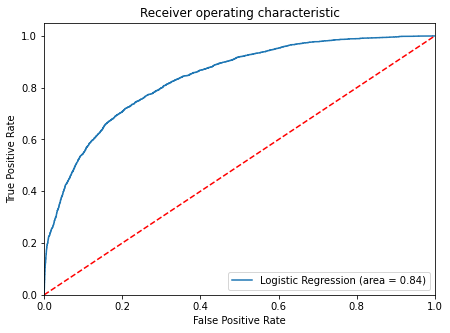

In [141]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on TEST set.

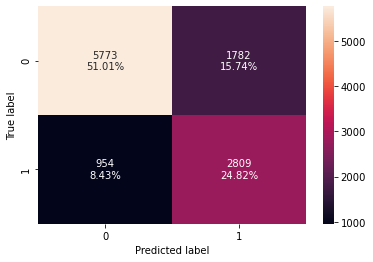

In [142]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc)

The confusion matrix

True Positives (TP): we correctly predicted that they do NOT CANCEL 51.01%

True Negatives (TN): we correctly predicted that they do CANCEL 24.82%

False Positives (FP): we incorrectly predicted that they do CANCEL (a "Type I error") 1782 Falsely predict positive Type I error (15.74%)

False Negatives (FN): we incorrectly predicted that they don't CANCEL (a "Type II error") 954 Falsely predict negative Type II error(8.43%)

In [143]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.758,0.746,0.612,0.672


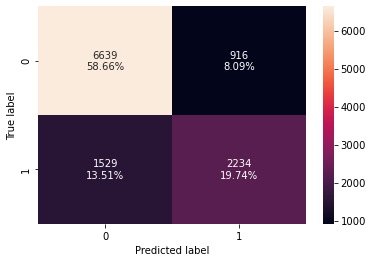

In [144]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_curve)

In [145]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.784,0.594,0.709,0.646


Precision and Accuracy of model have increased but the other metrics have reduced.
The model is still giving a good performance.

In [146]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodels",
    "Logistic Regression 0.36 Threshold",
    "Logistic Regression 0.51 Threshold",
    
]

print("test performance comparison:")
models_test_comp_df

test performance comparison:


,Logistic Regression statsmodels,Logistic Regression 0.36 Threshold,Logistic Regression 0.51 Threshold
Accuracy,0.783,0.758,0.784
Recall,0.606,0.746,0.594
Precision,0.701,0.612,0.709
F1,0.650,0.672,0.646


All the logistic regression models have given a generalized performance on the training and test set.
Recall score shows the best result on logestic regression 0.36 threshold (0.74).

f1_score on the train and test sets are comparable.

## Building a Decision Tree model

In [154]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [155]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [156]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.14, 1: 0.85}, random_state=1
)

In [157]:
model.fit(X_train7, y_train)

DecisionTreeClassifier(class_weight={0: 0.14, 1: 0.85}, random_state=1)

### Checking model performance on training set

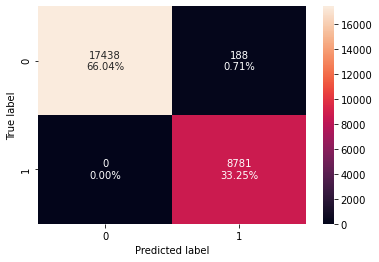

In [158]:
confusion_matrix_sklearn(model, X_train7, y_train)

In [159]:
decision_tree_perf_train = get_recall_score(model, X_train7, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


### Checking model performance on test set

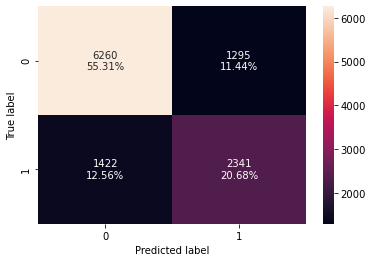

In [160]:
confusion_matrix_sklearn(model, X_test1, y_test)

In [161]:
decision_tree_perf_test = get_recall_score(model, X_test1, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.6221100186021791


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

In [162]:
## creating a list of column names
feature_names = X_train7.columns.to_list()

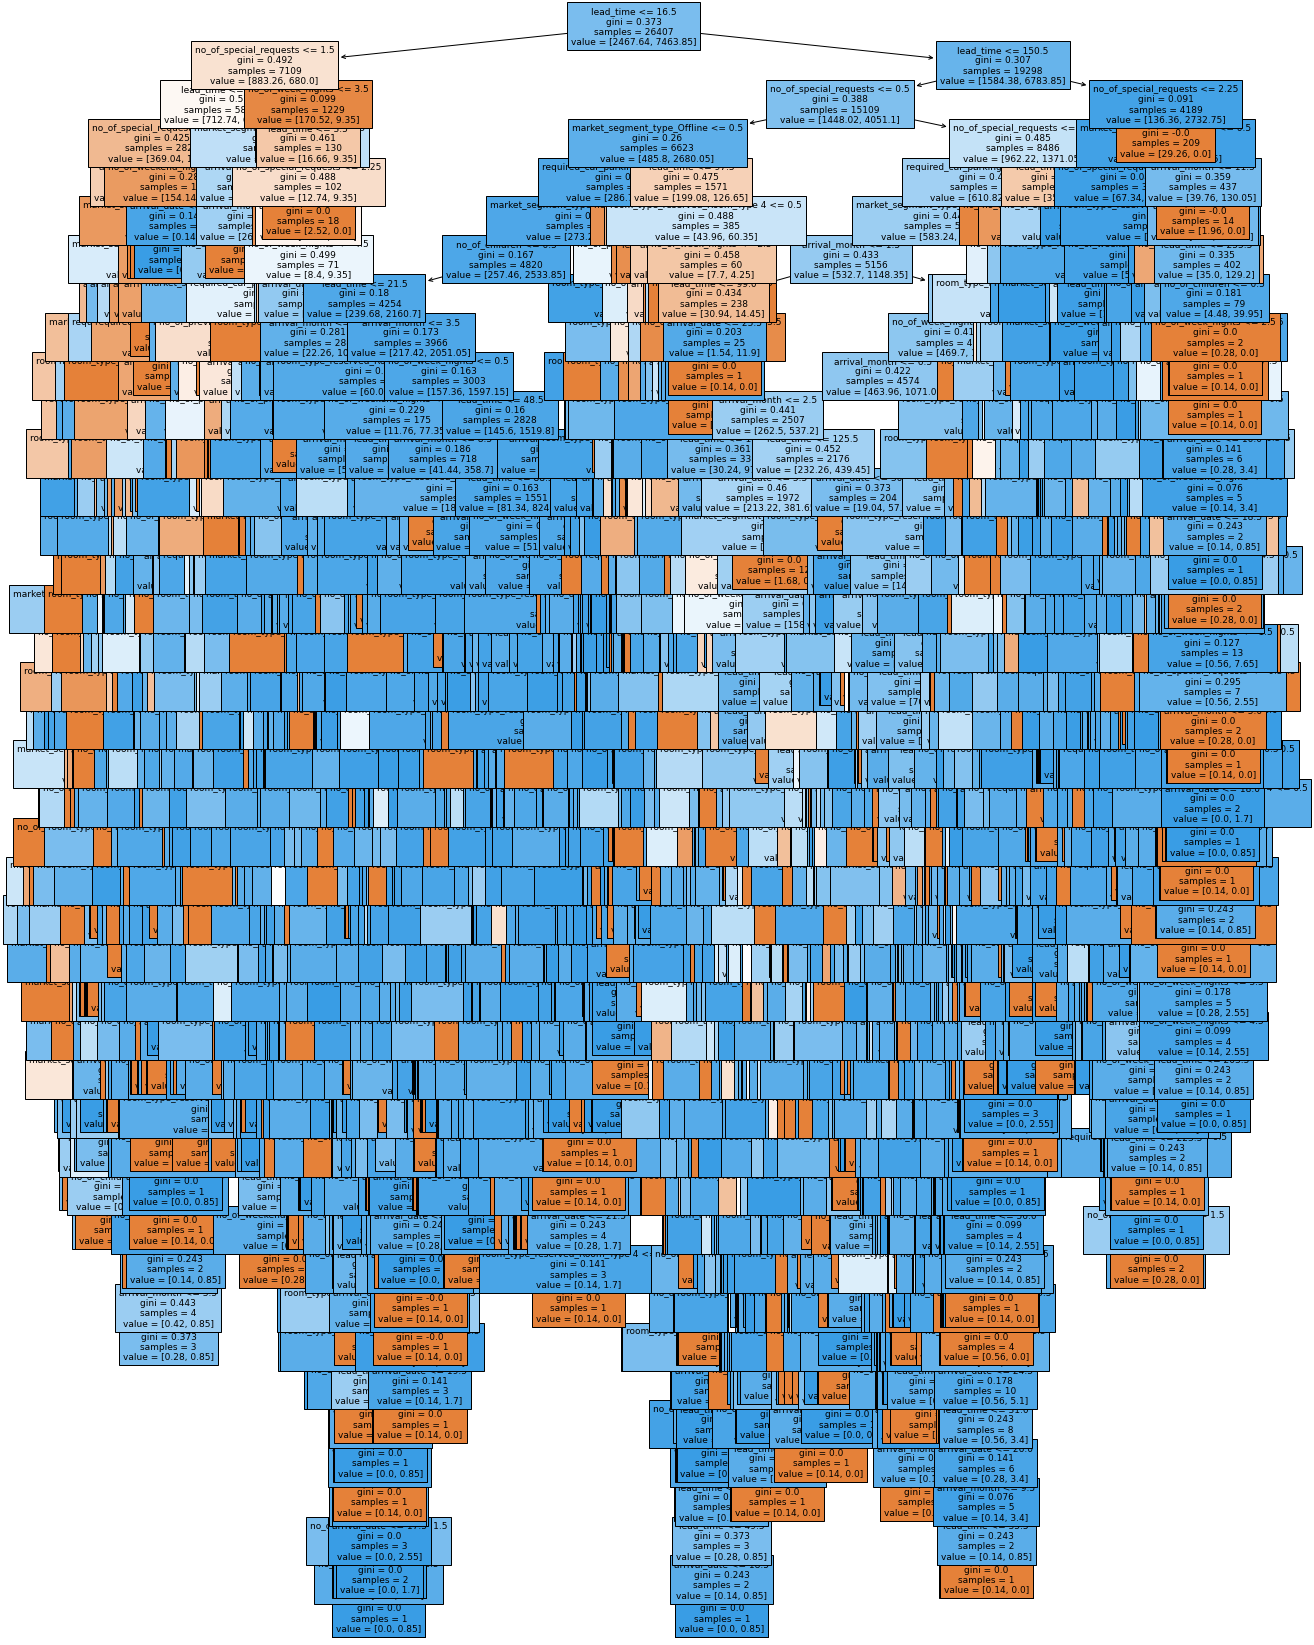

In [126]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [163]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train7.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
lead_time                       0.373305
arrival_date                    0.147902
no_of_special_requests          0.118229
arrival_month                   0.095939
no_of_week_nights               0.085332
market_segment_type_Offline     0.062460
no_of_weekend_nights            0.047092
room_type_reserved_Room_Type 4  0.017659
required_car_parking_space      0.016438
no_of_children                  0.013268
market_segment_type_Corporate   0.009663
room_type_reserved_Room_Type 5  0.004255
room_type_reserved_Room_Type 2  0.003448
room_type_reserved_Room_Type 6  0.003265
no_of_previous_cancellations    0.001748


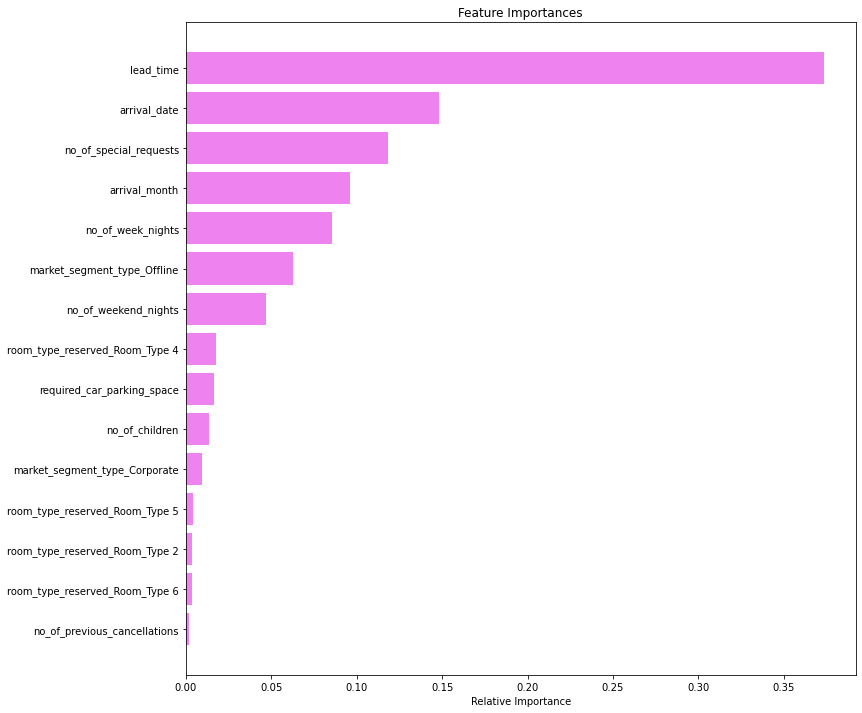

In [164]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the decision tree model, `lead_time` is the most important variable for predicting the cancelation.

## Do we need to prune the tree?

### yes there is a complexity and we should reduce the over fitting

### Reducing over fitting

In [165]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.14, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train7, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train7, y_train)

DecisionTreeClassifier(class_weight={0: 0.14, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.0001,
                       random_state=1, splitter='random')

#### Checking performance on training set

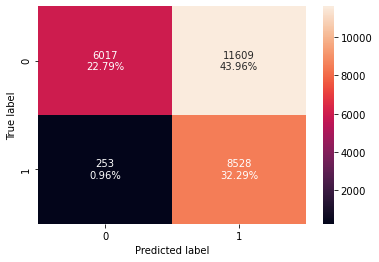

In [166]:
confusion_matrix_sklearn(estimator, X_train7, y_train)

In [167]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train7, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9711877918232548


### Checking performance on test set

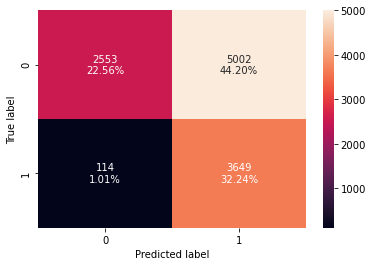

In [168]:
confusion_matrix_sklearn(estimator, X_test1, y_test)

In [169]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test1, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9697050225883603


* The model is giving a generalized result now.

## Visualizing the Decision Tree

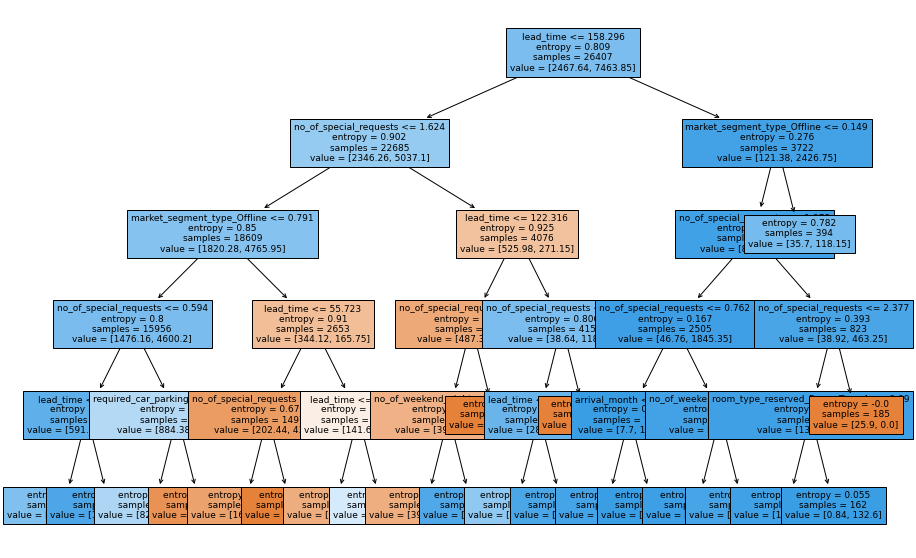

In [134]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [179]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 158.30
|   |--- no_of_special_requests <= 1.62
|   |   |--- market_segment_type_Offline <= 0.79
|   |   |   |--- no_of_special_requests <= 0.59
|   |   |   |   |--- lead_time <= 39.89
|   |   |   |   |   |--- weights: [400.26, 1122.00] class: 1
|   |   |   |   |--- lead_time >  39.89
|   |   |   |   |   |--- weights: [191.52, 2039.15] class: 1
|   |   |   |--- no_of_special_requests >  0.59
|   |   |   |   |--- required_car_parking_space <= 0.54
|   |   |   |   |   |--- weights: [828.94, 1431.40] class: 1
|   |   |   |   |--- required_car_parking_space >  0.54
|   |   |   |   |   |--- weights: [55.44, 7.65] class: 0
|   |   |--- market_segment_type_Offline >  0.79
|   |   |   |--- lead_time <= 55.72
|   |   |   |   |--- no_of_special_requests <= 0.60
|   |   |   |   |   |--- weights: [164.36, 43.35] class: 0
|   |   |   |   |--- no_of_special_requests >  0.60
|   |   |   |   |   |--- weights: [38.08, 0.00] class: 0
|   |   |   |--- lead_time >  55.72
|   |   |   |   |

In [170]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train7.columns
    ).sort_values(by="Imp", ascending=False)
)


                                     Imp
lead_time                       0.445663
no_of_special_requests          0.370906
market_segment_type_Offline     0.148377
required_car_parking_space      0.022753
no_of_weekend_nights            0.010187
room_type_reserved_Room_Type 4  0.001306
arrival_month                   0.000807
no_of_children                  0.000000
no_of_week_nights               0.000000
arrival_date                    0.000000
no_of_previous_cancellations    0.000000
room_type_reserved_Room_Type 2  0.000000
room_type_reserved_Room_Type 5  0.000000
room_type_reserved_Room_Type 6  0.000000
market_segment_type_Corporate   0.000000


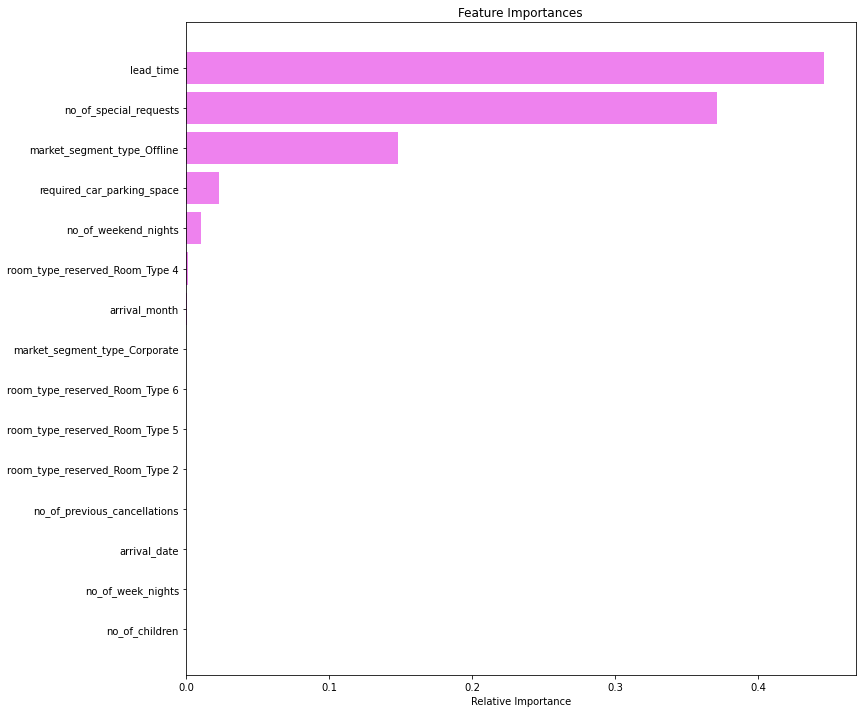

In [171]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In tuned decision tree `lead_time` is the most important feature followed by `no_of_special_request`.

## Cost Complexity Pruning

In [137]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.14, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train7, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [138]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000,0.004
1,0.000,0.004
2,0.000,0.004
3,0.000,0.004
4,0.000,0.004
...,...,...
2980,0.007,0.278
2981,0.007,0.285
2982,0.015,0.300
2983,0.018,0.336


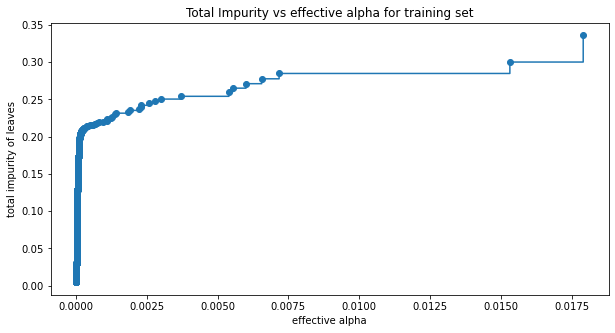

In [139]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [140]:
lfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.14, 1: 0.85}
    )
    clf.fit(X_train7, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.037436862236564616


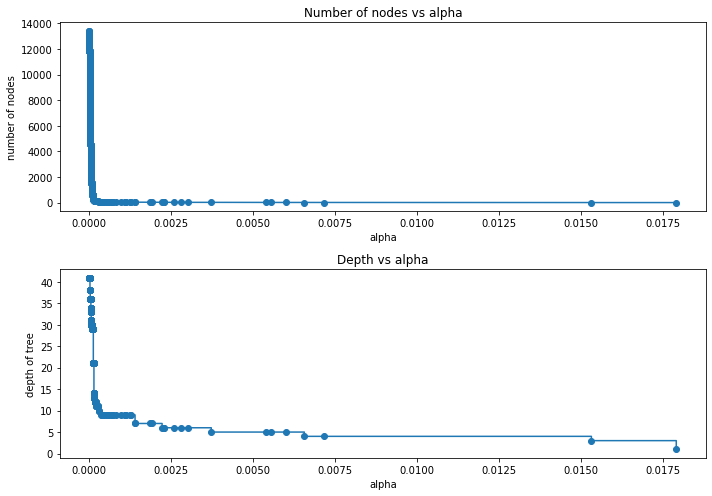

In [141]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [142]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train7)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [143]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test1)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [144]:
train_scores = [clf.score(X_train7, y_train) for clf in clfs]
test_scores = [clf.score(X_test1, y_test) for clf in clfs]

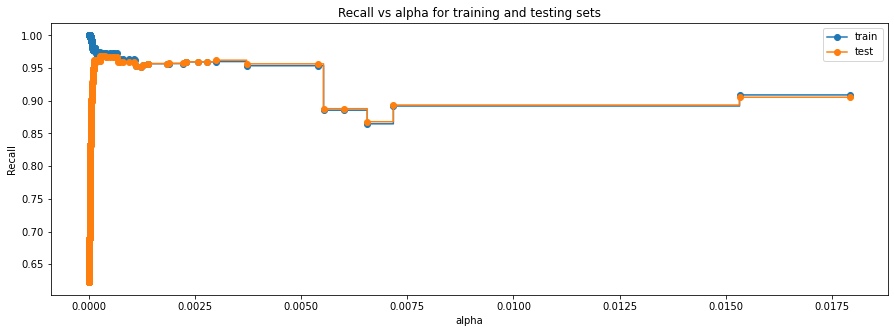

In [145]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [146]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)


DecisionTreeClassifier(ccp_alpha=0.00027836630003469305,
                       class_weight={0: 0.14, 1: 0.85}, random_state=1)


In [147]:
best_model.fit(X_train7, y_train)

DecisionTreeClassifier(ccp_alpha=0.00027836630003469305,
                       class_weight={0: 0.14, 1: 0.85}, random_state=1)

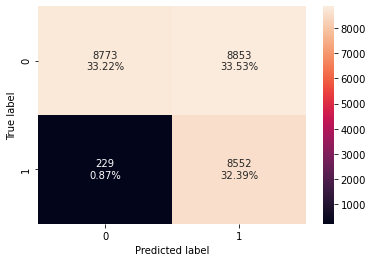

In [148]:
confusion_matrix_sklearn(best_model, X_train7, y_train)

In [149]:
print("Recall Score:", get_recall_score(best_model, X_train7, y_train))


Recall Score: 0.973920965721444


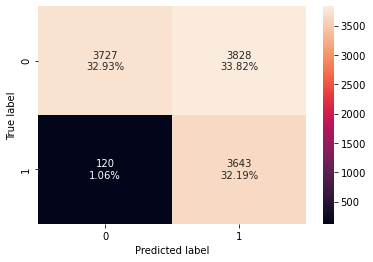

In [150]:
confusion_matrix_sklearn(best_model, X_test1, y_test)

In [151]:
print("Recall Score:", get_recall_score(best_model, X_test1, y_test))


Recall Score: 0.968110550093011


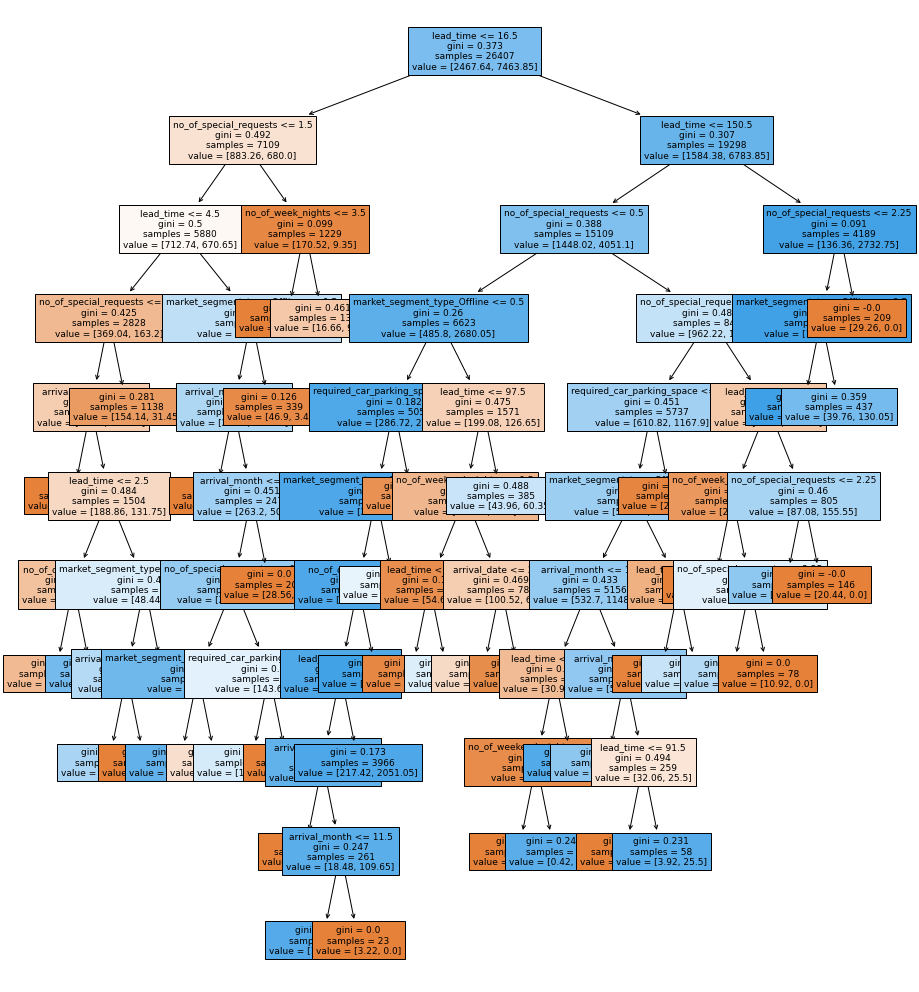

In [152]:
plt.figure(figsize=(15, 18))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [172]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.14, 1: 0.85}, random_state=1
)
best_model2.fit(X_train7, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.14, 1: 0.85},
                       random_state=1)

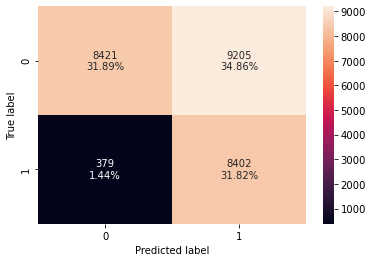

In [173]:
confusion_matrix_sklearn(best_model2, X_train7, y_train)


In [174]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train7, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.956838628857761


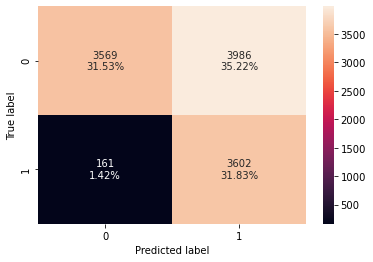

In [175]:
confusion_matrix_sklearn(best_model2, X_test1, y_test)

In [176]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test1, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9572149880414563


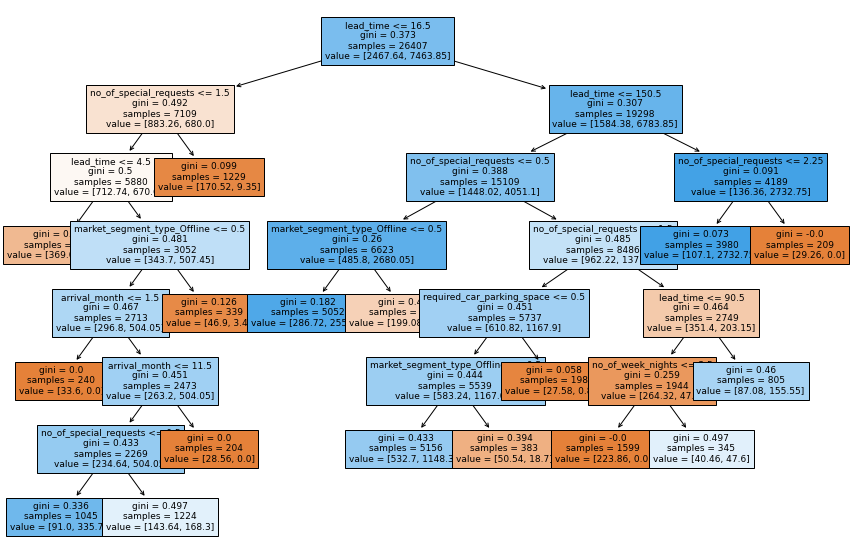

In [95]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Model Performance Comparison and Conclusions

In [177]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.971188
2,0.956839


In [178]:
# training performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on test set"],
)

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,Recall on test set
0,0.622110
1,0.969705
2,0.957215


* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions


We analyzed the "StarHotels Project" using different techniques and used Decision Tree Classifier to build a predictive model for the same.

The model built can be used to predict if a customer is going to cancel their booking or not.

We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.

lead_time, no_of_special_requests and market_segment_type_Offlines are the most important variable in predicting the guests that will cancel the book.
We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

According to the decision tree model -

a) If a guest booking a room with lead_time less than or equal to 158.30 there's a very high chance the guest will not cancel his or her reservation.

b) If a guest booking a room with lead_time less than or equal to 158.30 and no_of_special_requests is less than or equal to 1.62 then there is a very high chance that the guest will not cancel his or her reservation.

c)If a guest booking a room with lead_time less than or equal to 158.30 and no_of_special_requests is less than or equal to 1.62 and market_segment_type_Offline  is less than or equal 0.79 then there is a very high chance that the guest will not cancel his or her reservation.

It is observed that the less lead time in the reservation, less number of special requests, and fewer children lead to not cancelation guests booking. By present a good deal or service to people who have a high number of children or have a high special request it may lead to getting a lower chance of canceling between them.

It is observed that repeating guests, who stay in the hotel often and are important to brand equity will cancel their booking with a very small percentage (near to zero). so, I think offering a good deal for new guests for second booking can help the hotel to get a high number of repeat guests.


the online market segment with 82% is on the top of Market segment designation. I believe that managers should invest more in this segment.
